In [18]:
%matplotlib inline

import numpy as np
from numpy import sin,cos,pi,exp,sqrt
import matplotlib.pylab as plt 

In [14]:
# load the required packages for making animation within IPython Notebook
# embed the animated result into HTML by JSAnimation 
from matplotlib import animation
from JSAnimation import IPython_display

(0, 3)

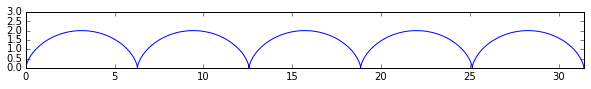

In [3]:

plt.figure(figsize=(10,1))
t=np.linspace(0,10*np.pi,301)
x=t-sin(t)
y=1-cos(t)
plt.plot(x,y)
plt.xlim(0,10*np.pi)
plt.ylim(0,3)

(0, 3.0)

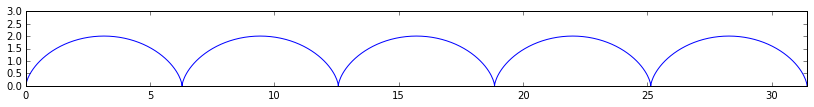

In [4]:
# Refine the picture by scaling its dimensions, for instance 1 to 1 unit
xn=10*np.pi
yn=3.
scale=xn/yn;
width=14;
plt.figure(figsize=(width,width/scale))

plt.plot(x,y)
plt.xlim(0,xn)
plt.ylim(0,yn)

**Matplotlib** also includes a simple API for generating animations for sequences of figures. With the function, FuncAnimation, we cngenerate a movie file from sequences of figures.  Its arguments include: 
- `fig`: a figure canvas,
- `func`, a function that we provide which updates the figure,
- `init_func`, a function we provide to setup the figure, 
- `frame`, the number of frames to generate, and 
- `blit`, which tells the animation function to only update parts of the frame which have changed (for smoother animations):

Algorithm of Animation generating
---
```Python
def init():
    # setup figure
def update(frame_counter):
    # update figure for new frame

anim = animation.FuncAnimation(fig,update,  
init_func=init, frames=100, blit=True)

anim.save('animation.mp4', fps=30) 
# fps = frames per second
```

In [4]:
#To use the animation features in matplotlib we first need to import the module matplotlib.animation:
from matplotlib import animation



In [8]:
def circle(a, b, r=1):
    """
    create circle centred at (a,b) with radius r
    """
    
    T = 100
    x, y = [0]*T, [0]*T
    for i,theta in enumerate(np.linspace(0,2*np.pi,T)):
        x[i] = a + r*np.cos(theta)
        y[i] = b + r*np.sin(theta)
    return x, y

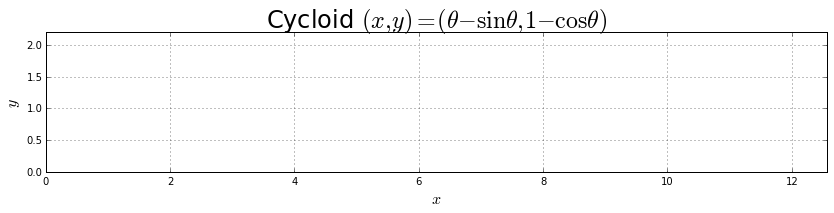

In [9]:
xn=4*np.pi

fig, ax = plt.subplots(figsize=(14,2.5))
ax.set_ylim(0, 2.2)
ax.set_xlim(0, xn)
ax.set_xlabel(r'$x$',size=16)
ax.set_ylabel(r'$y$',size=16)
ax.set_title(r'Cycloid $(x,y)=(\theta-\sin\theta,1-\cos\theta)$',size=24)
ax.grid()
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

In [10]:
cycloid, = ax.plot([], [], 'r-', lw=2)
role,=ax.plot([], [], 'r--', lw=1)
circle_line, = ax.plot([], [], 'g',lw=2)
point, = ax.plot([], [], 'bo', ms=8,   marker='o')

In [11]:
R=1
xx, yy = [], []
nframes=100
dt=xn/nframes

def init():
     cycloid.set_data([], [])  
     circle_line.set_data([],[])  
     point.set_data([],[])  
     role.set_data([],[]) 

In [12]:
def update(i):
    x=i*dt-sin(i*dt)
    y=1-cos(i*dt)

    xx.append(x)
    yy.append(y)
    cx, cy = circle(i*dt, 1, R)
    
    cycloid.set_data(xx, yy)
    circle_line.set_data(cx, cy)
    point.set_data(x, y)
    role.set_data([x,i*dt],[y,1])


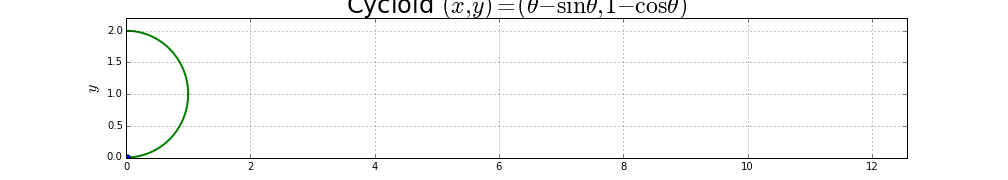
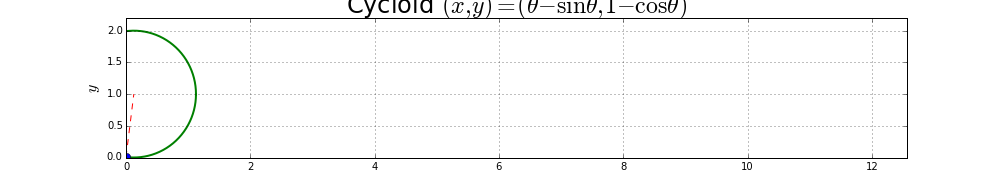
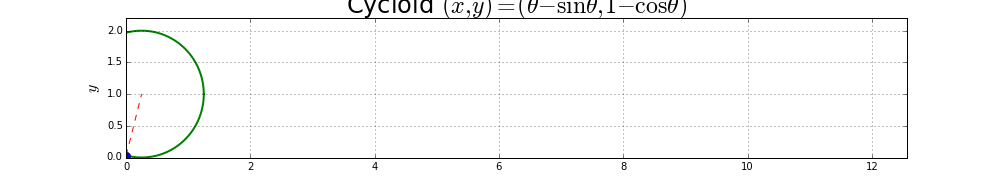
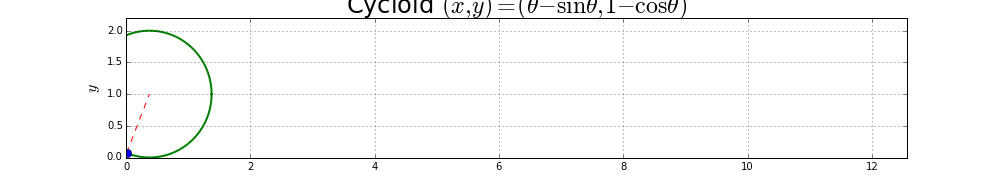
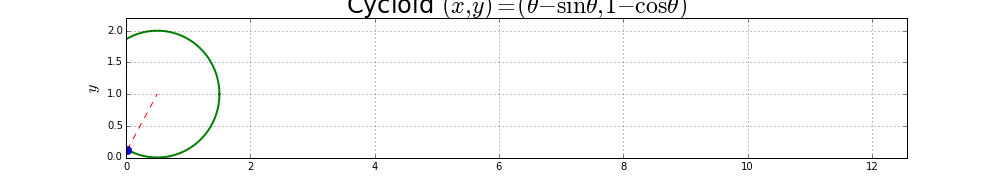
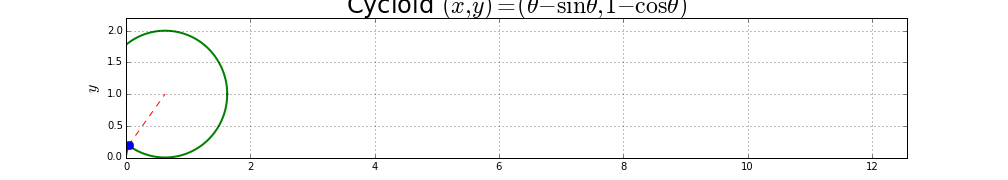
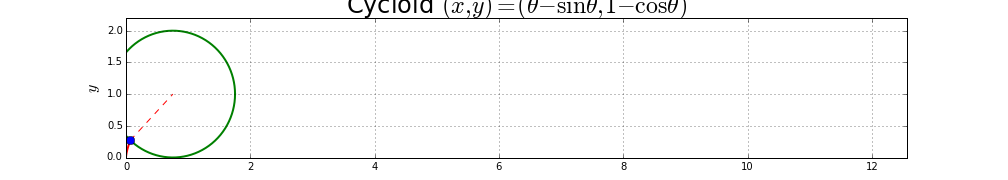
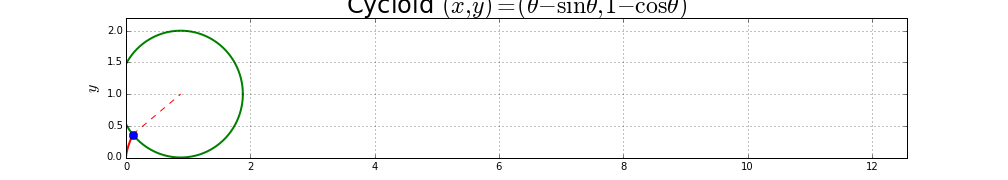
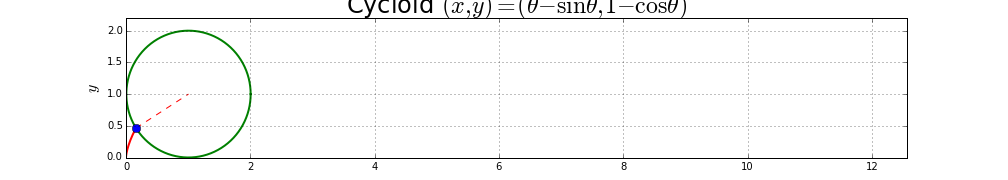
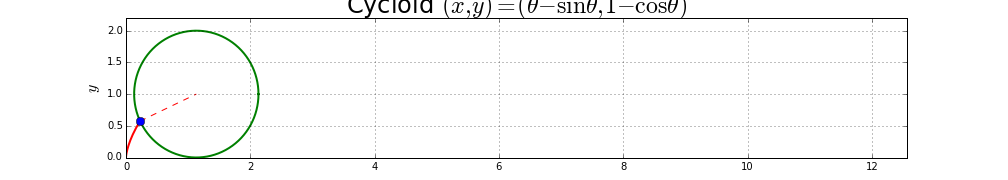
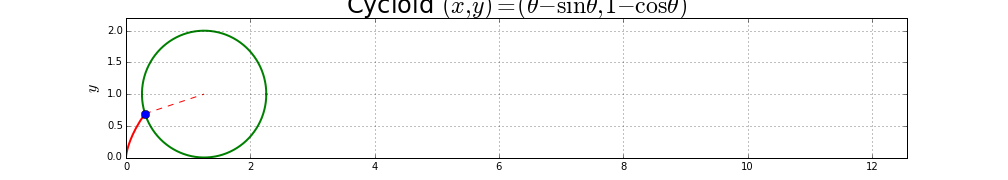
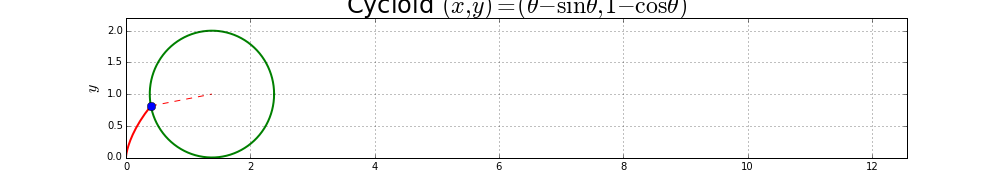
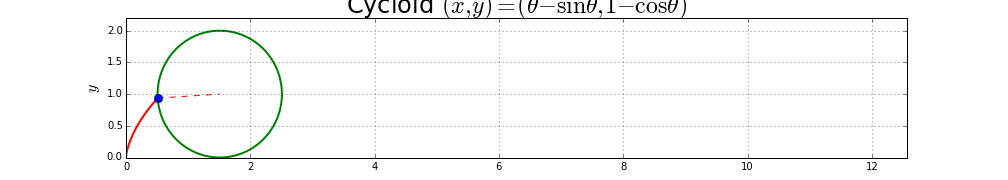
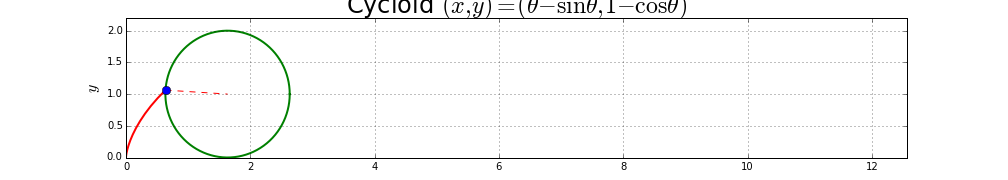
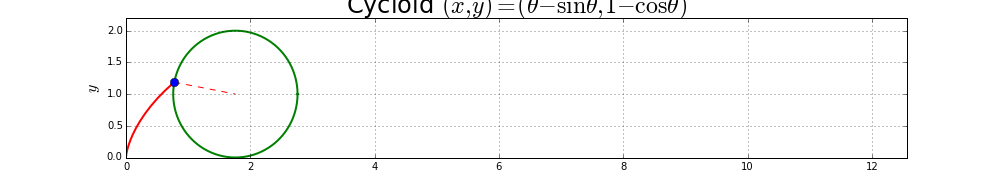
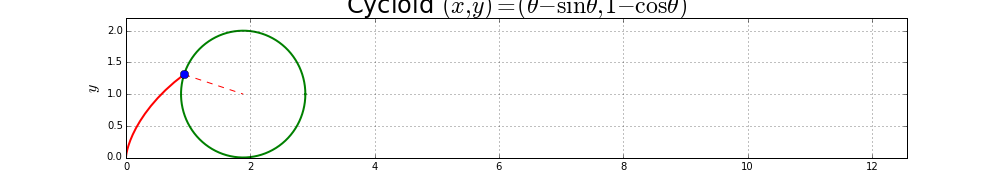
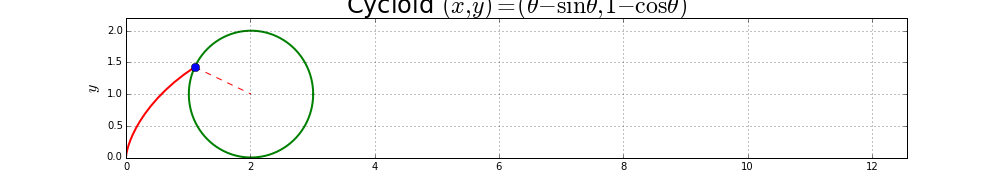
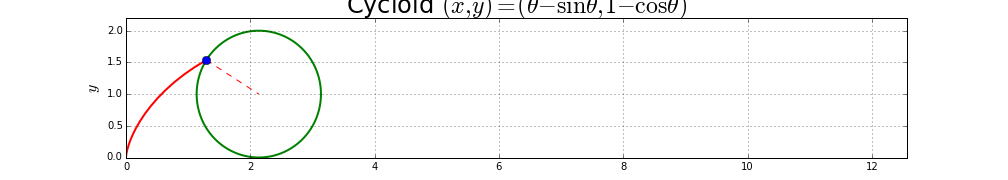
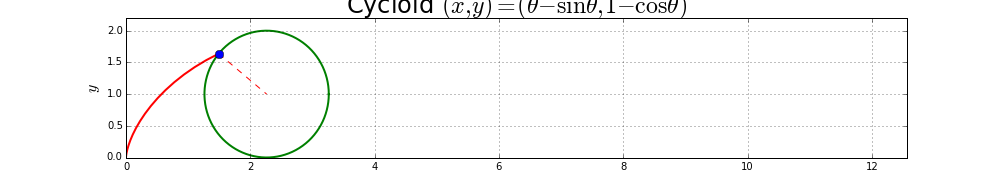
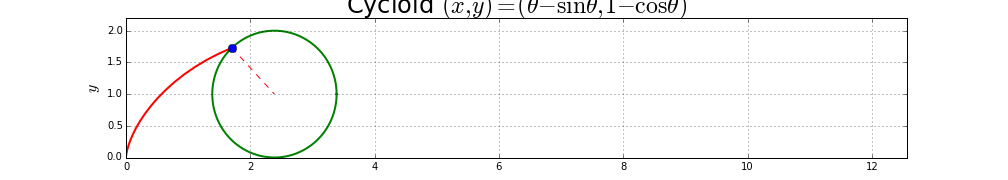
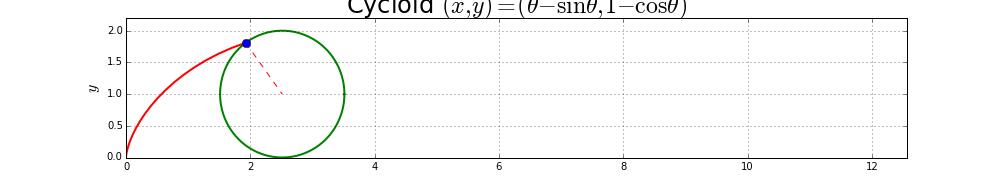
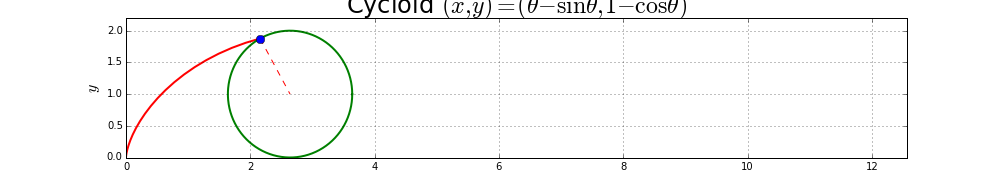
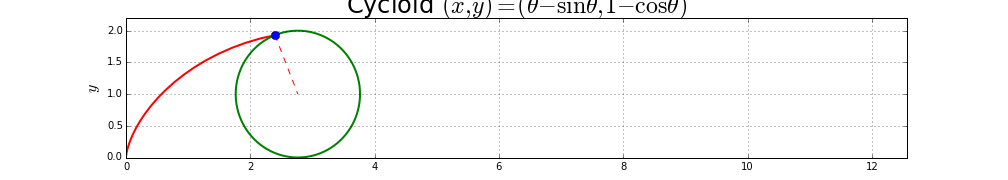
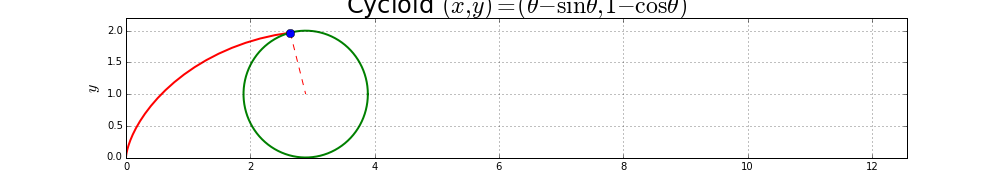
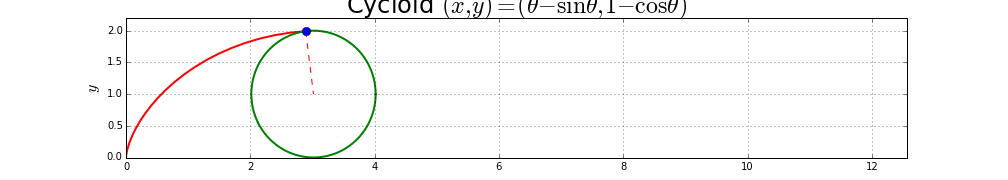
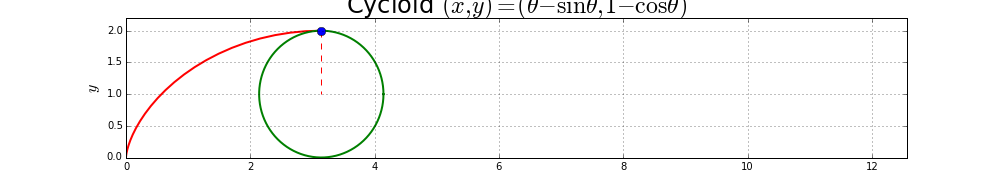
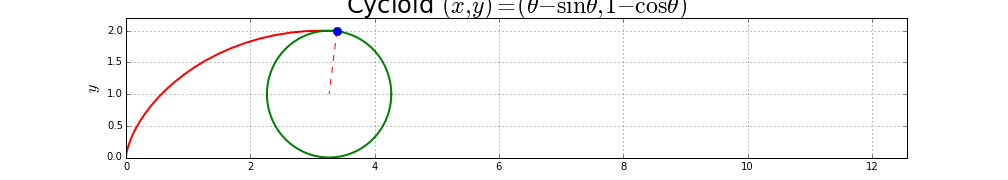
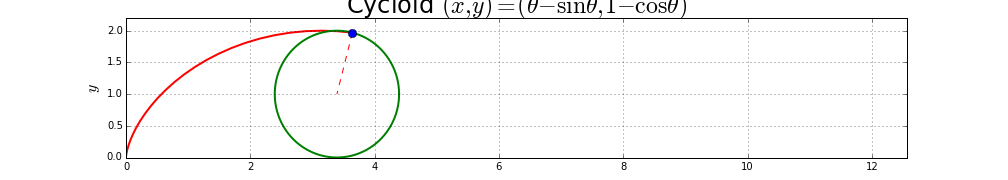
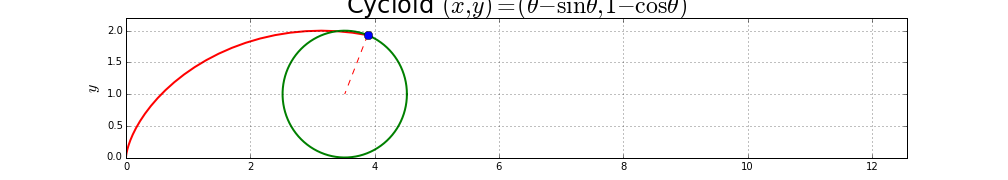
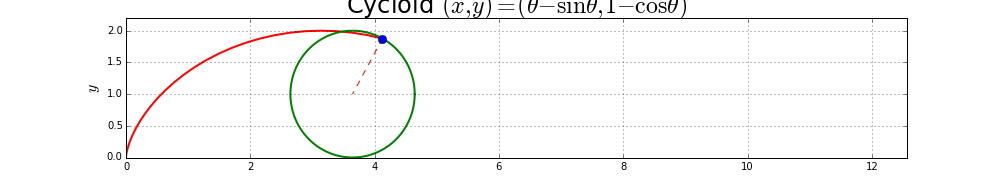
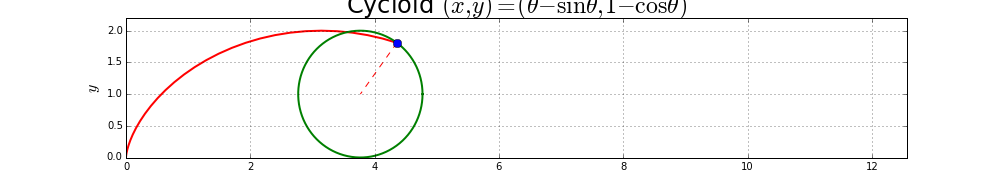
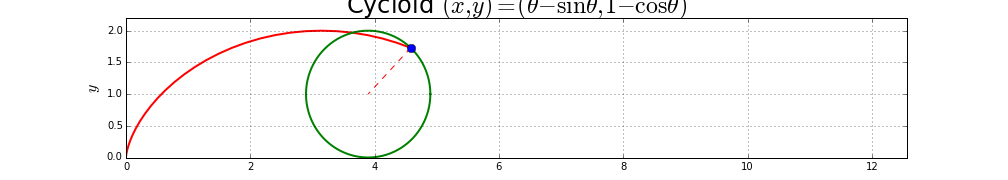
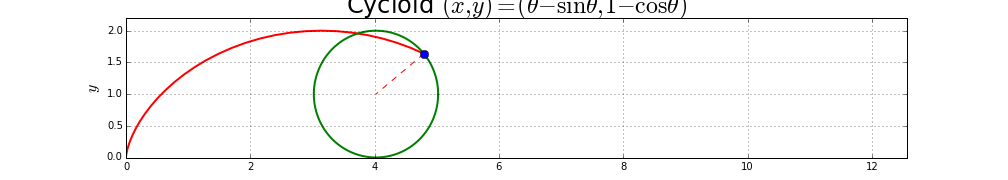
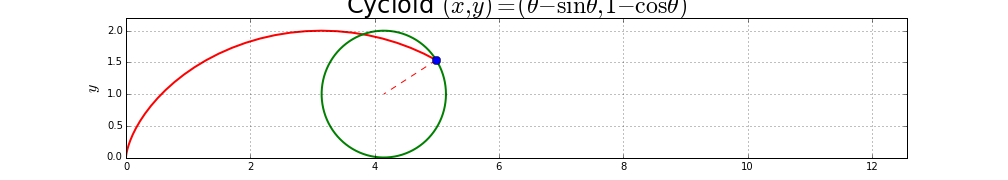
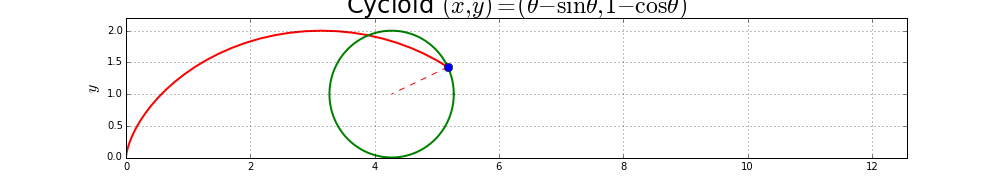
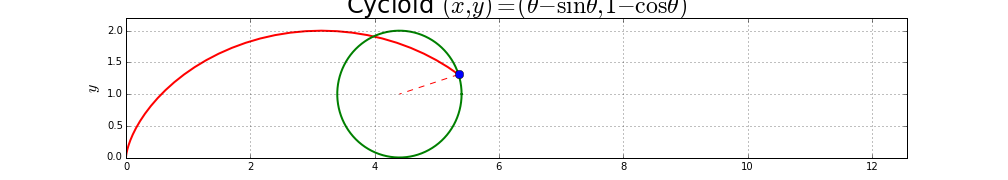
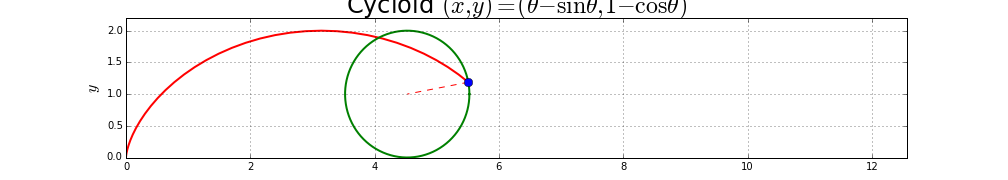
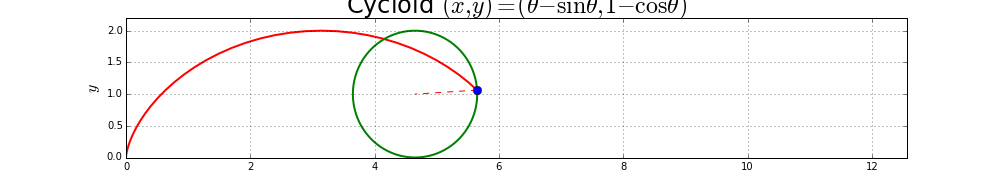
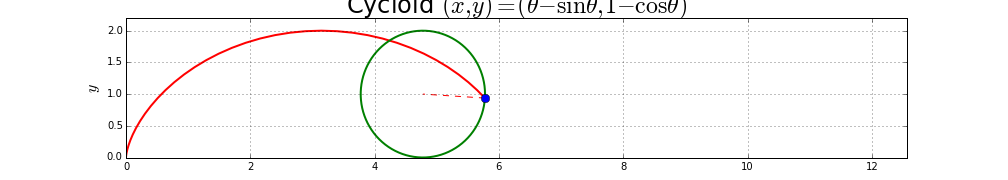
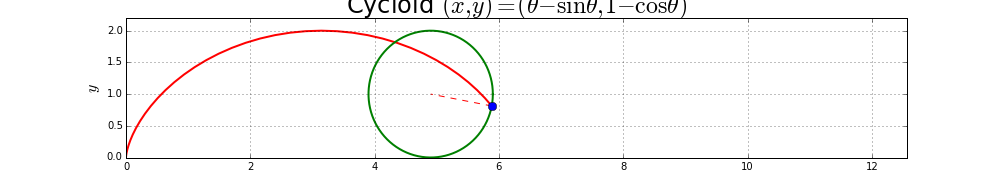
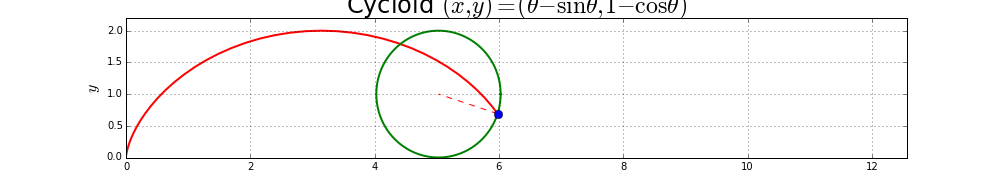
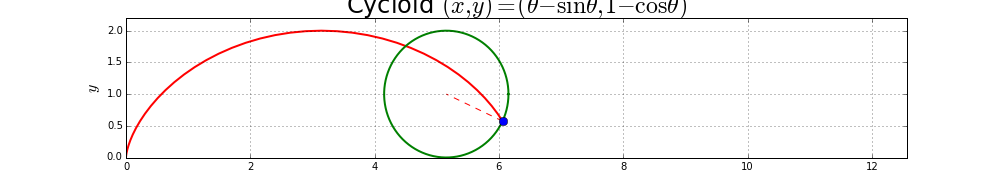
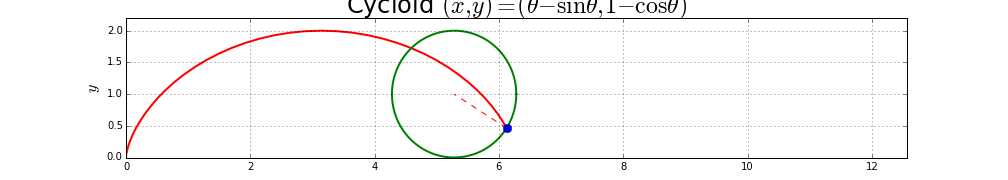
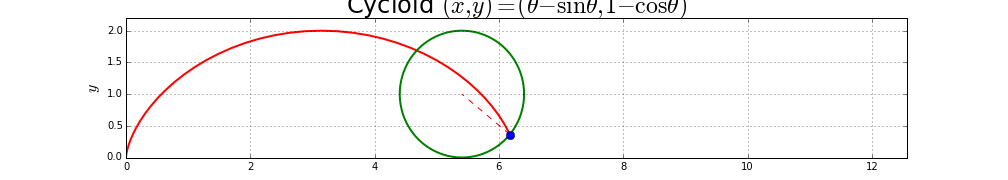
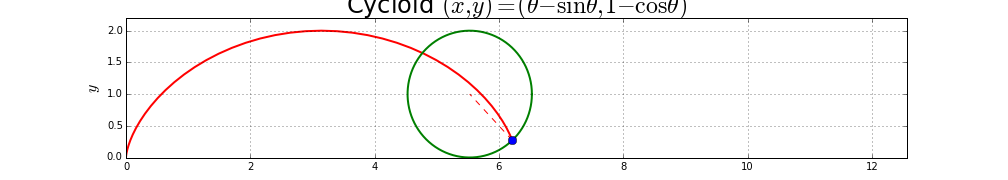
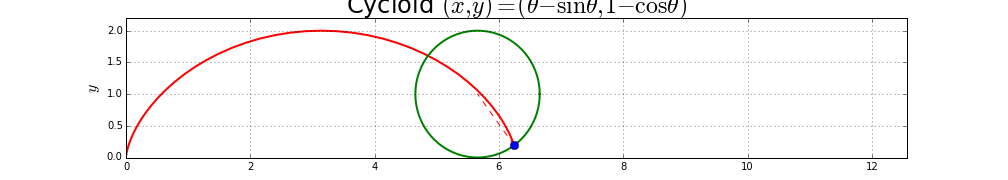
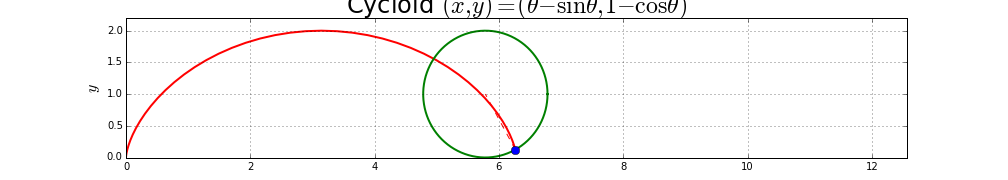
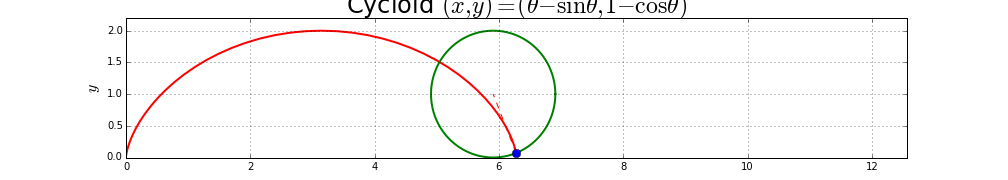
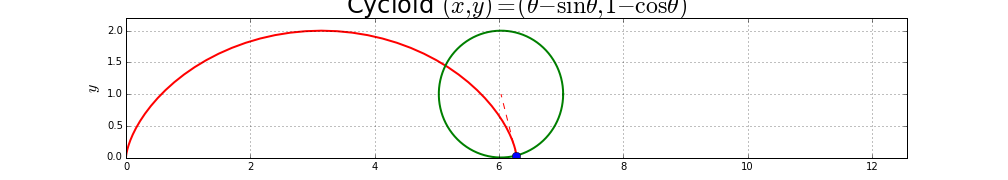
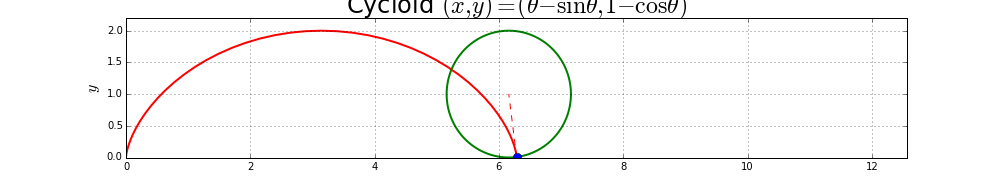
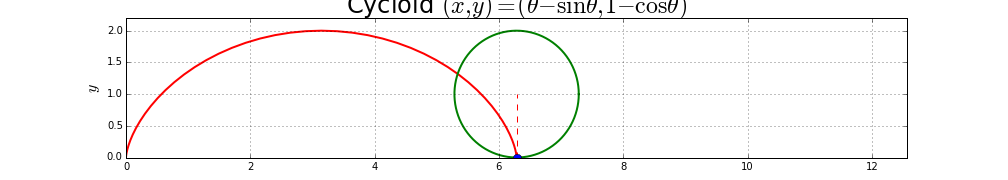
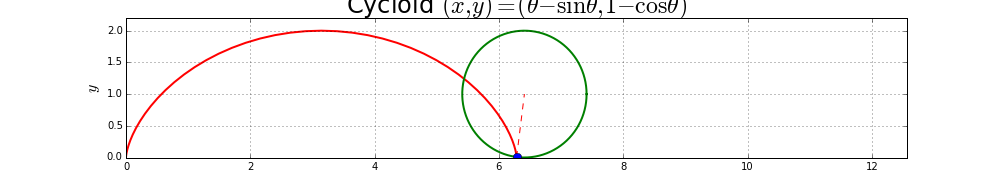
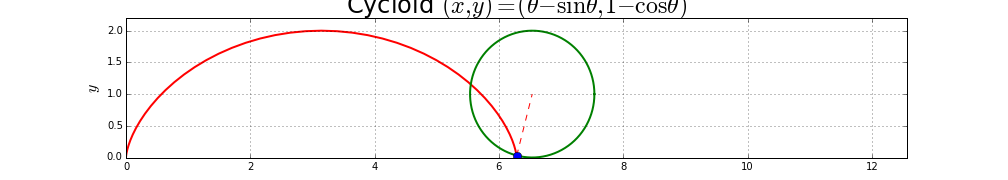
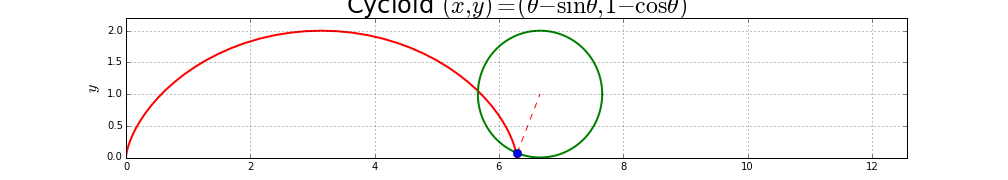
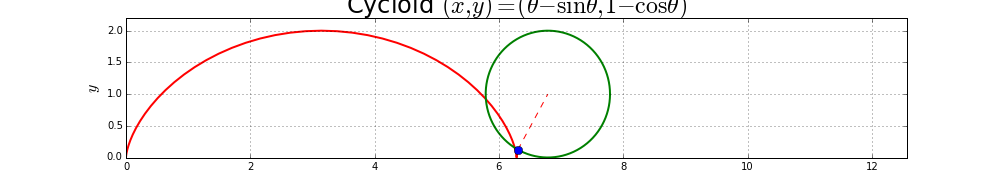
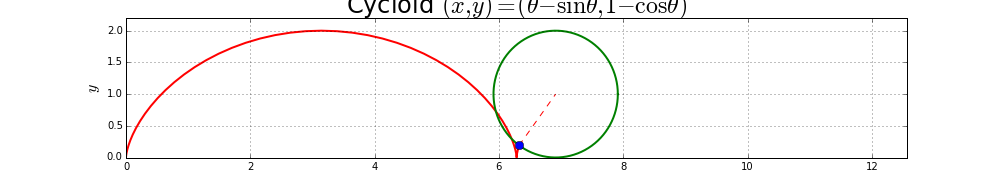
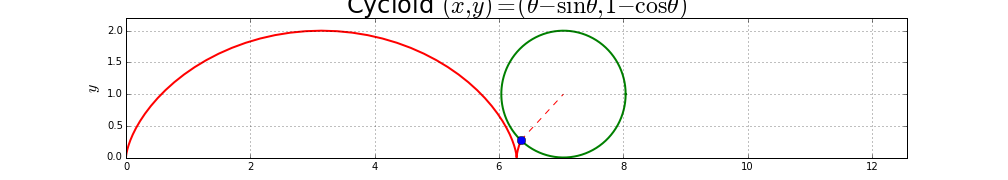
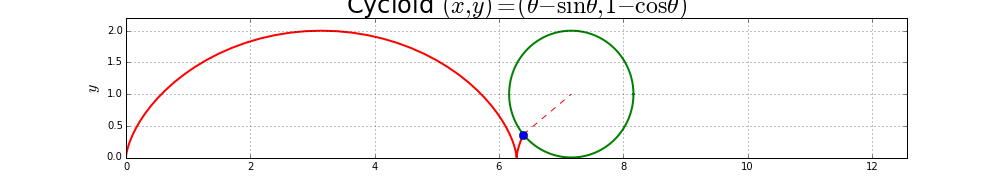
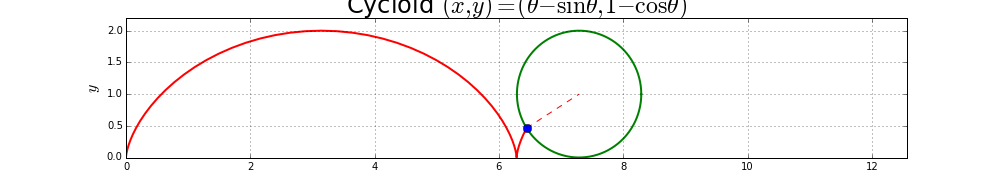
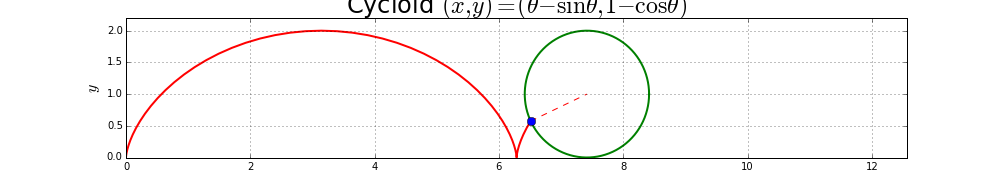
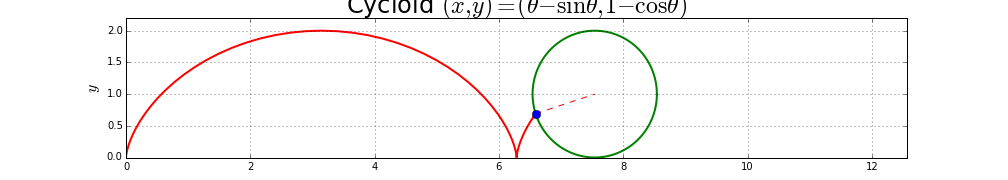
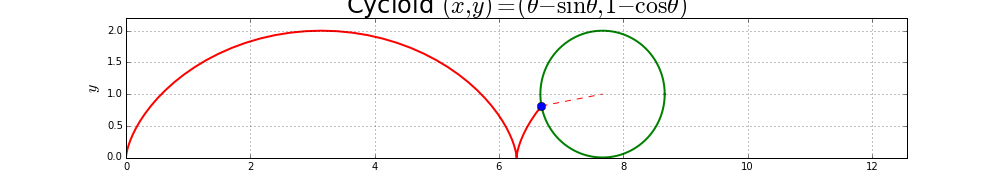
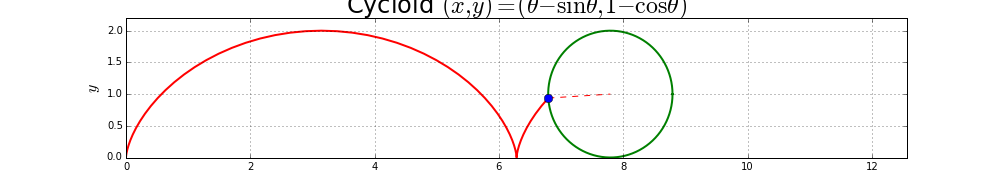
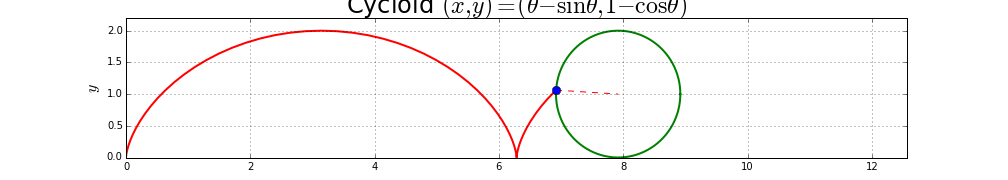
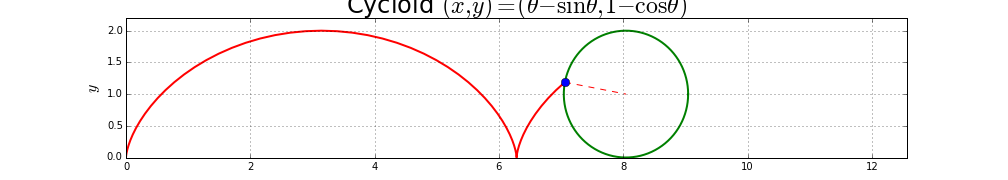
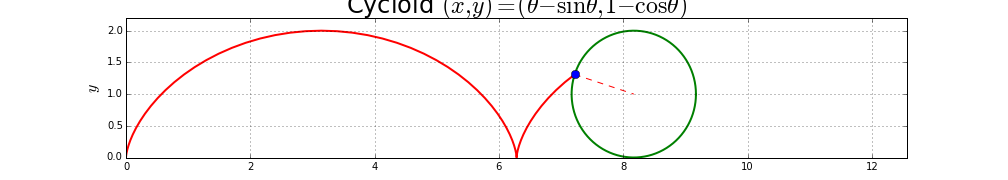
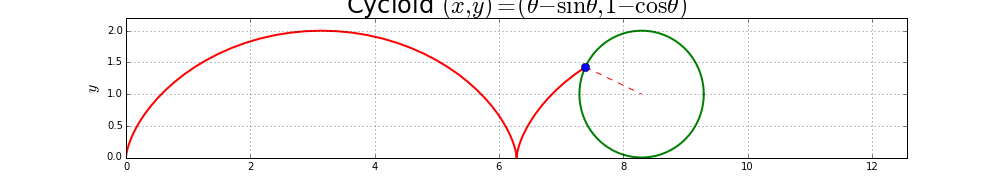
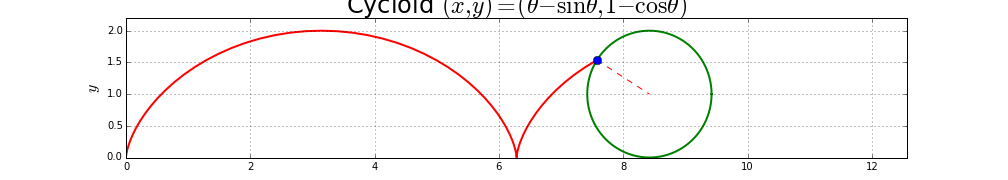
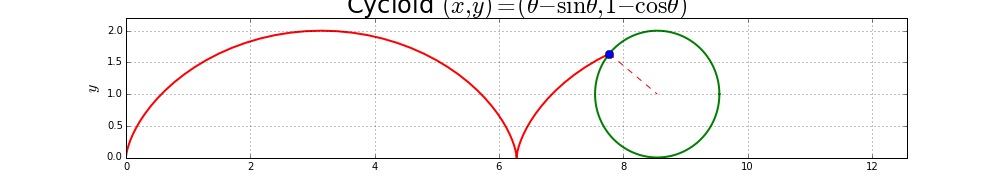
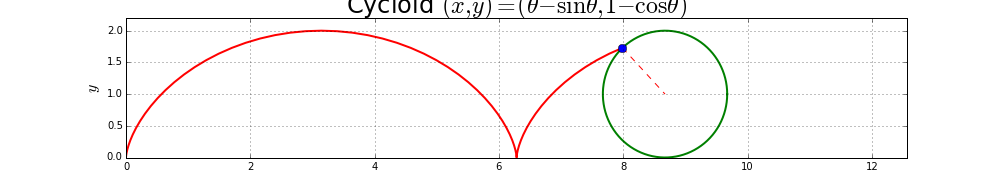
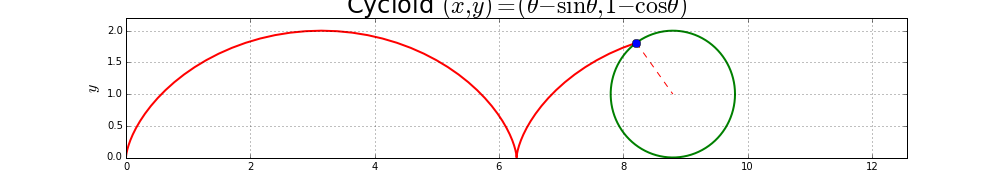
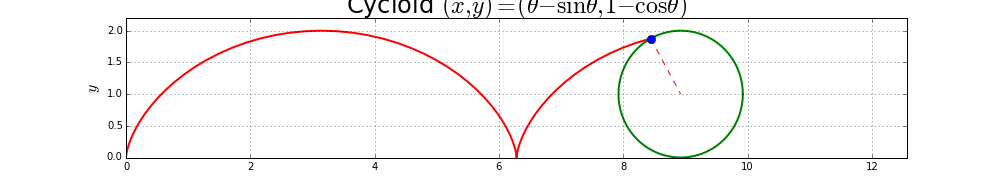
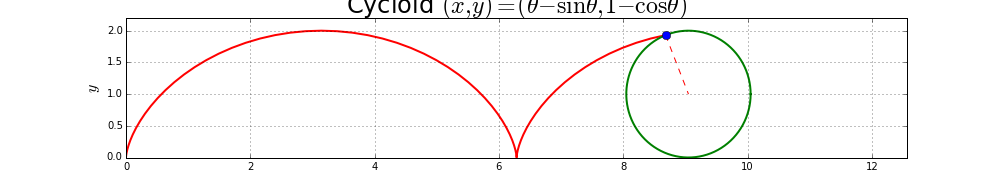
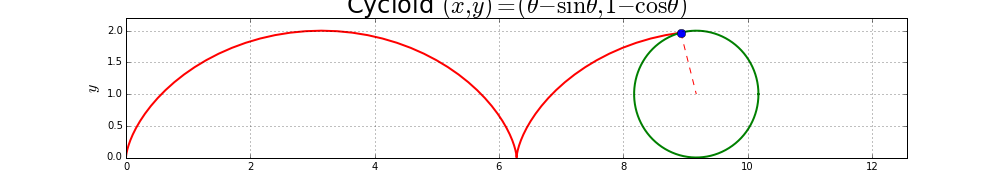
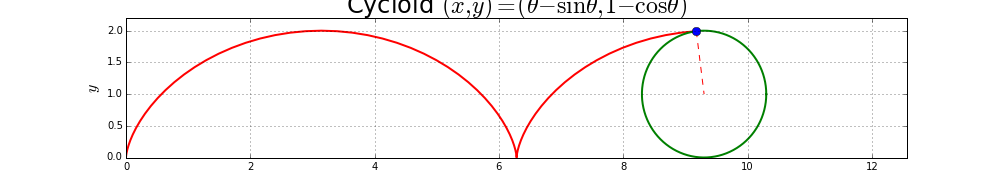
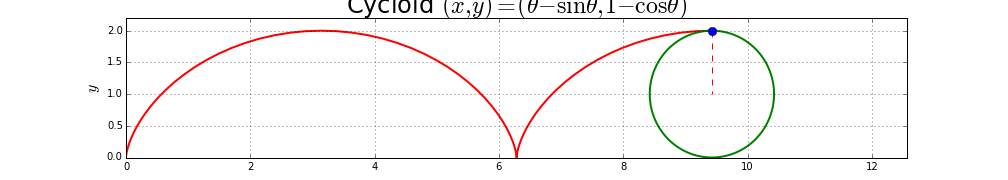
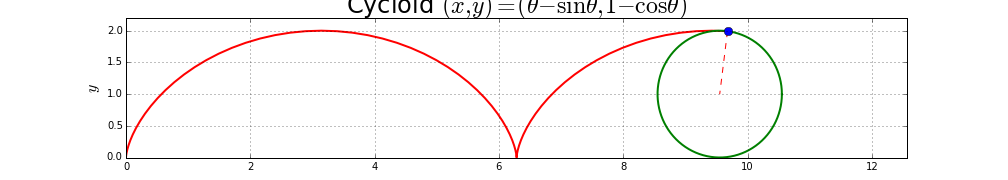
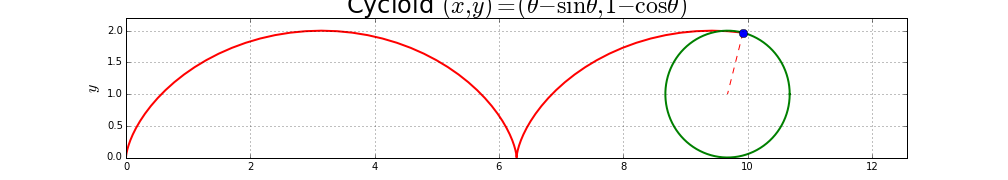
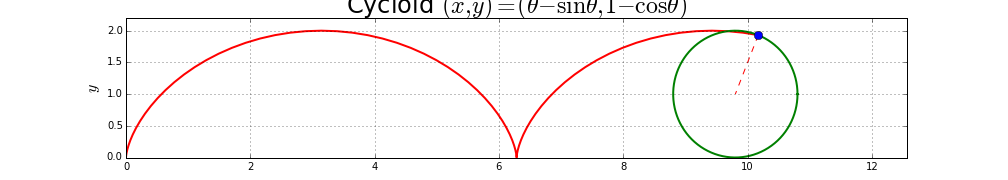
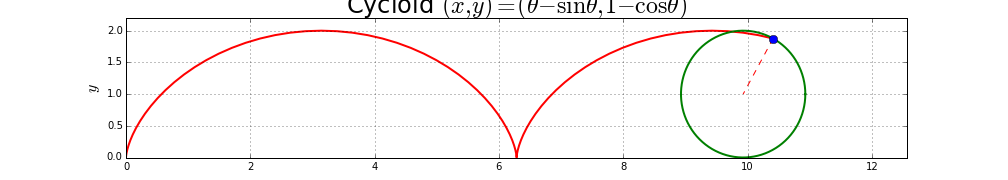
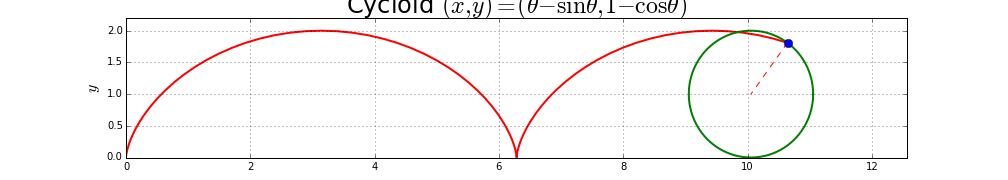
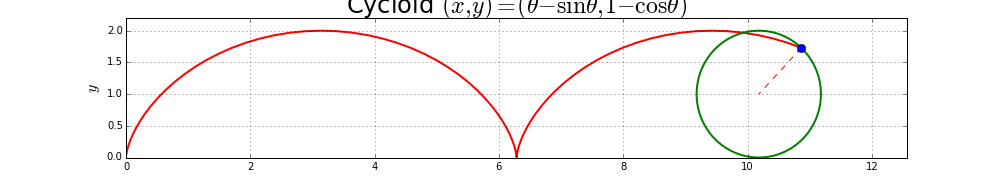
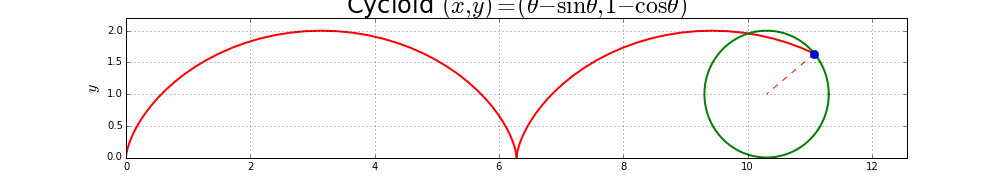
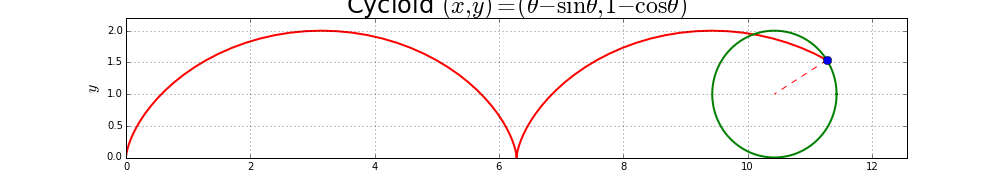
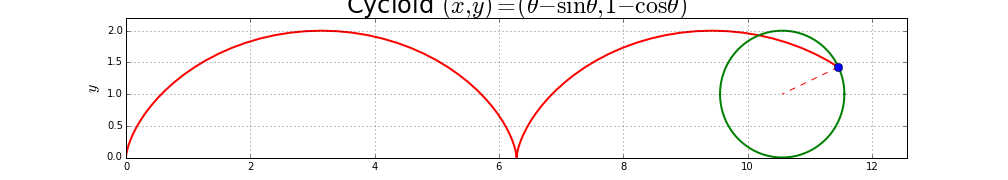
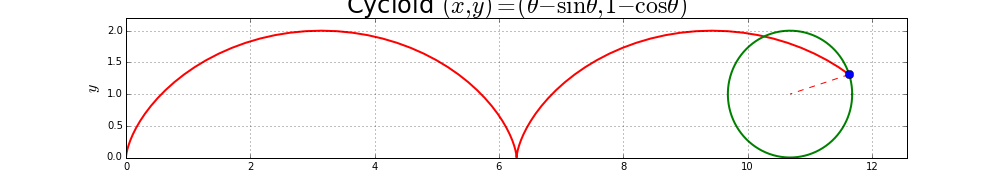
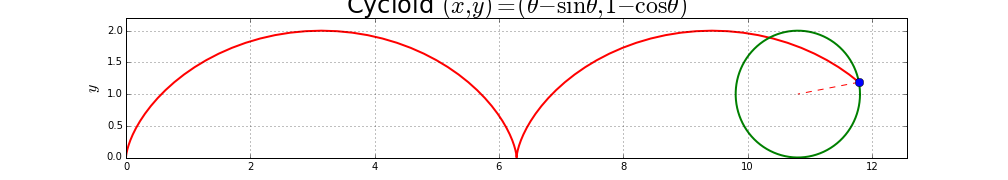
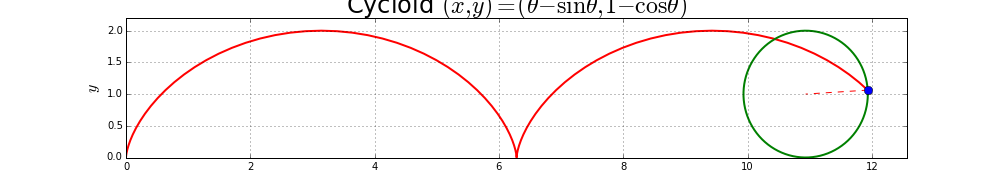
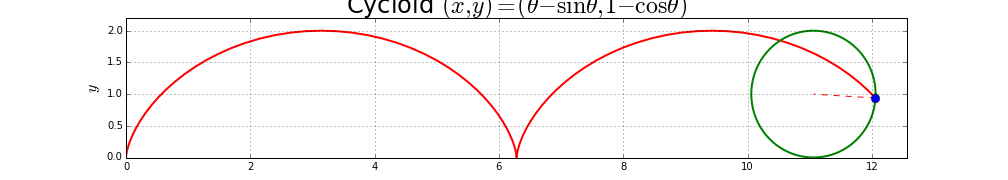
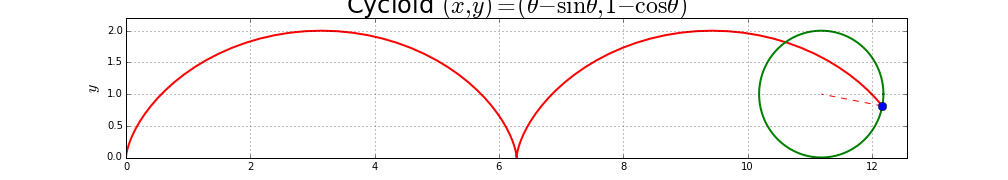
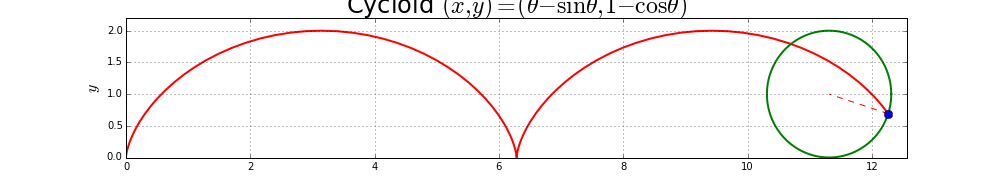
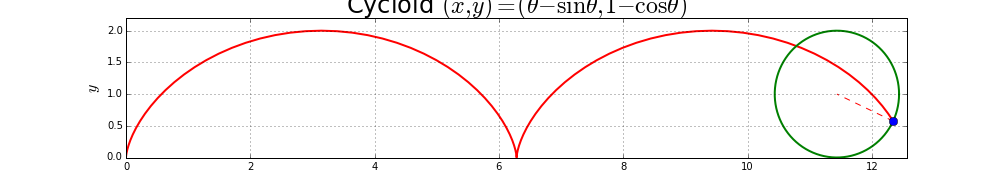
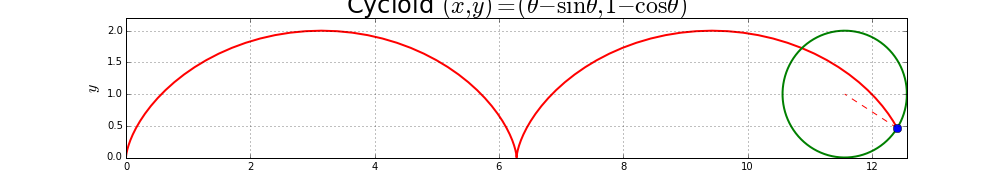
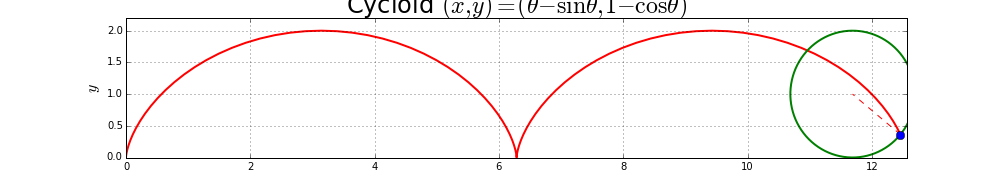
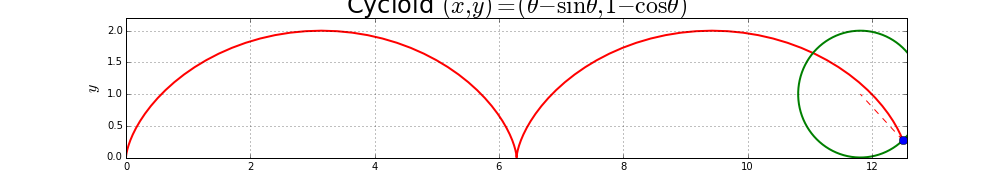
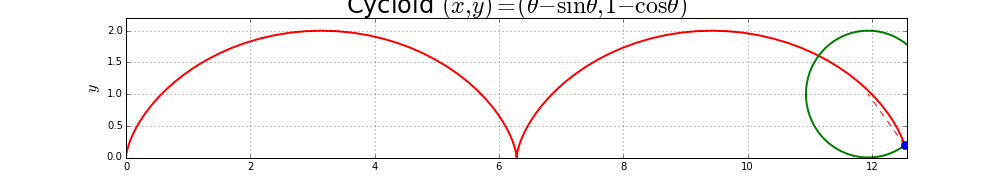
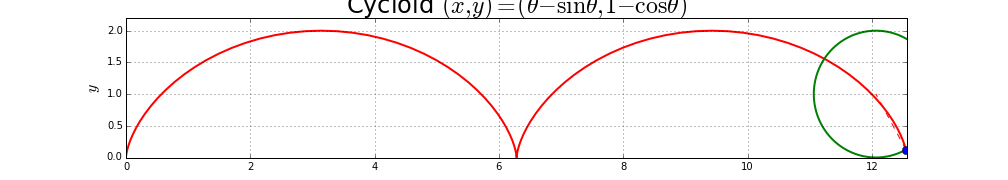
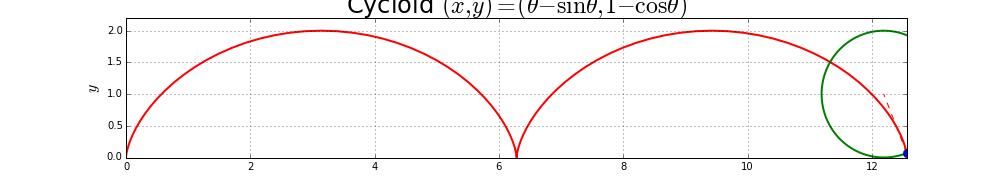
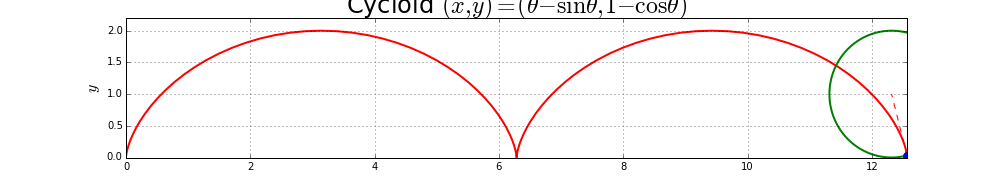
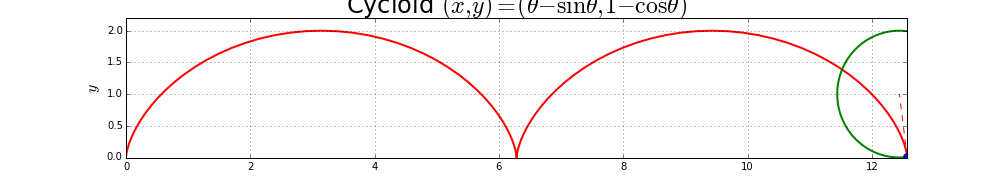

In [15]:
animation.FuncAnimation(fig, update, init_func=init, frames=nframes, blit=True)

In [17]:
plt.close(fig)

Astroid
===
Consider a small circle rolls inside a big circle and along its curve. The trajectory of fixed point on the small cirle will form a famous geometrical curve, called astroid. 



Parametric Form
---
The trajectory of the fixed point, $(x,y)$, is in the following parametric form:
$$ (x,y)=(a\sin^3 x,  a \cos^3 x).$$
This means that $(x,y)$ satisfies:
$$ x^{2/3}+y^{2/3}=a^{2/3}$$

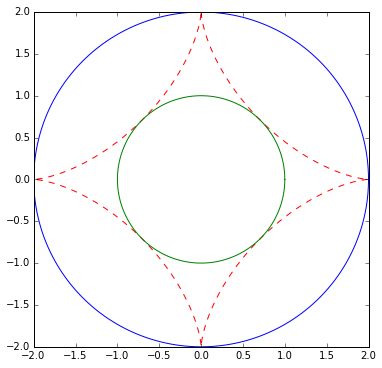

In [20]:
a=2
plt.figure(figsize=(6,6))
t=np.linspace(0,2*np.pi,400)
x,y=a*(sin(t))**3,a*(cos(t))**3
xx,yy=a*cos(t),a*sin(t)
x3,y3=a*cos(t)/2,a*sin(t)/2
plt.plot(x,y,'r--',xx,yy,x3,y3)

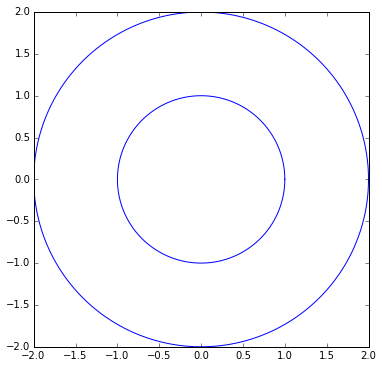

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
a=2
astroid, = ax.plot([], [], 'r-', lw=2)
point, = ax.plot([], [], 'bo', ms=8,   marker='o')
circle_line, = ax.plot([], [], 'g',lw=2)
t=np.linspace(0,2*np.pi,400)
xx,yy=a*(sin(t)),a*(cos(t))
x3,y3=a*cos(t)/2,a*sin(t)/2
ax.plot(xx,yy,'b',x3,y3,'b')

In [22]:
# Define range of display, number of frames, and time interval 
xn=2*np.pi
nframes=100
dt=xn/nframes

# Reset the program's data
xa, ya = [], []
def init():
     astroid.set_data([], [])   
     circle_line.set_data([],[])     
     point.set_data([],[])  

In [23]:
# Update the data, coordinate ofrolling point, and redraw the rolling circle  
def update(i):
    x,y=a*(sin(i*dt))**3,a*(cos(i*dt))**3
    
    xa.append(x)
    ya.append(y)
    cx, cy = circle((a-a/4.)*sin(i*dt), (a-a/4.)*(cos(i*dt)), a/4.)

    astroid.set_data(xa, ya)
    circle_line.set_data(cx, cy)
    point.set_data(x, y)


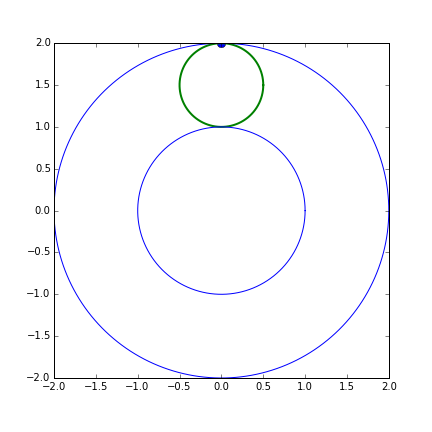
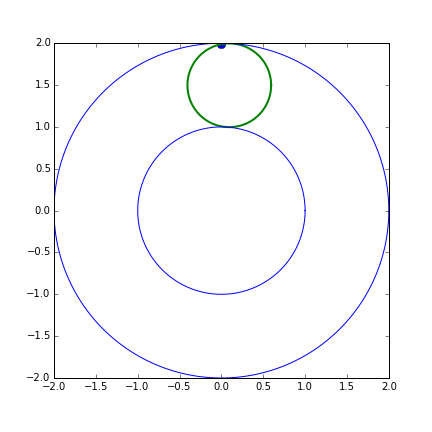
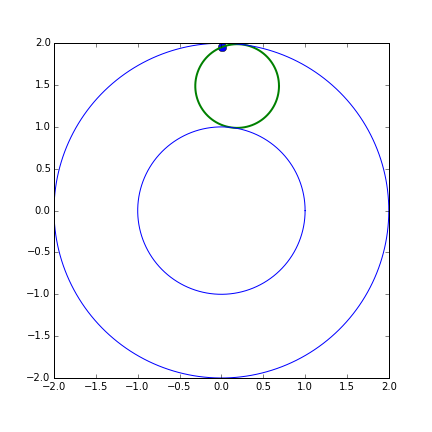
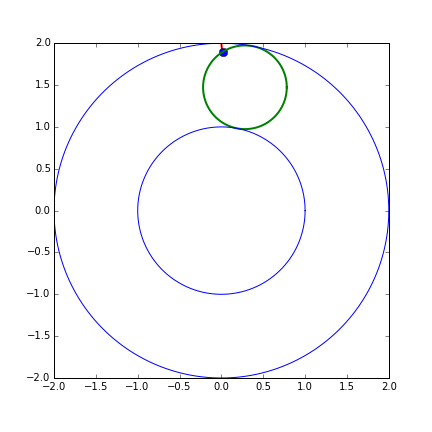
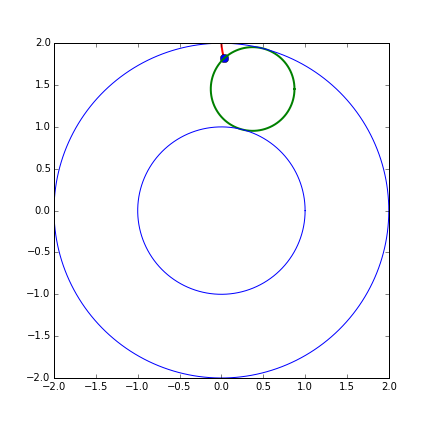
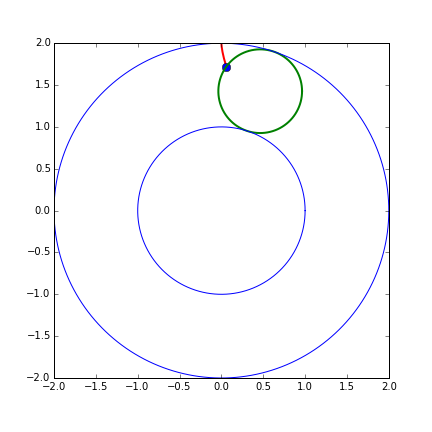
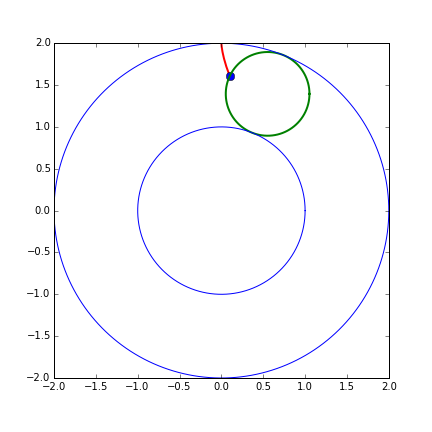
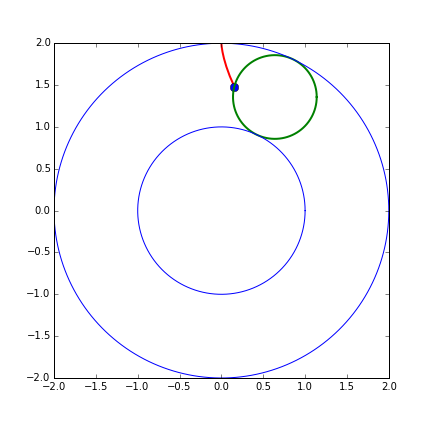
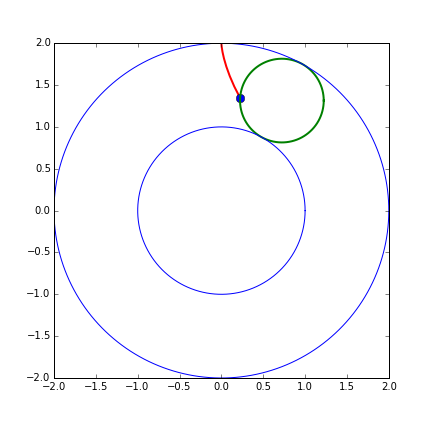
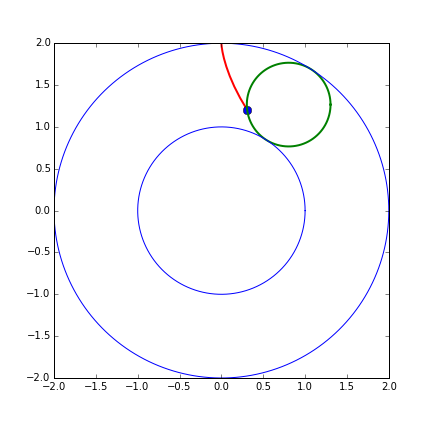
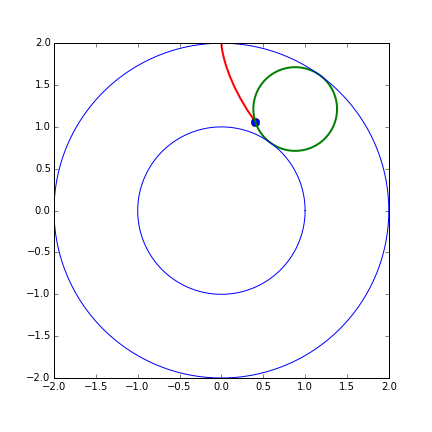
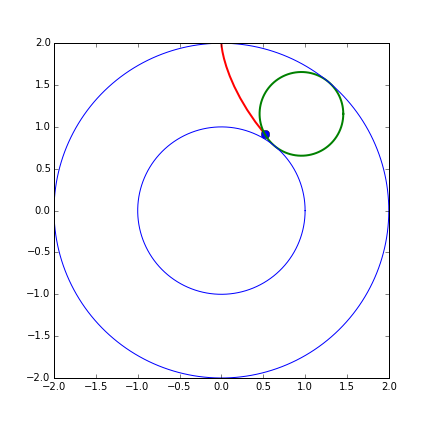
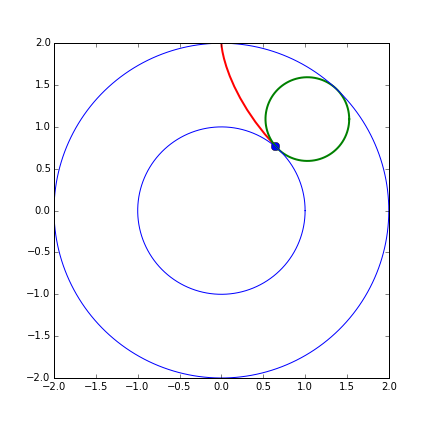
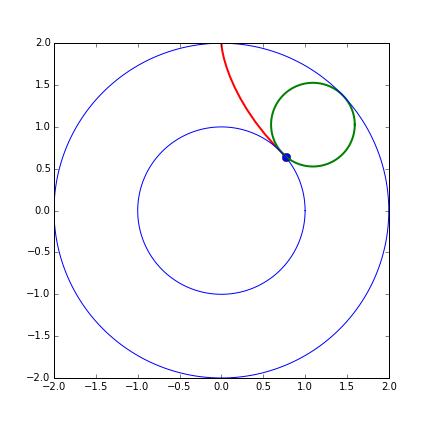
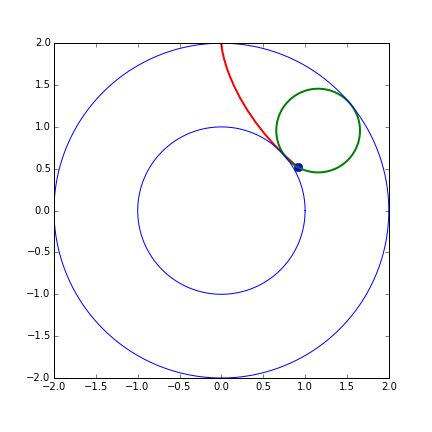
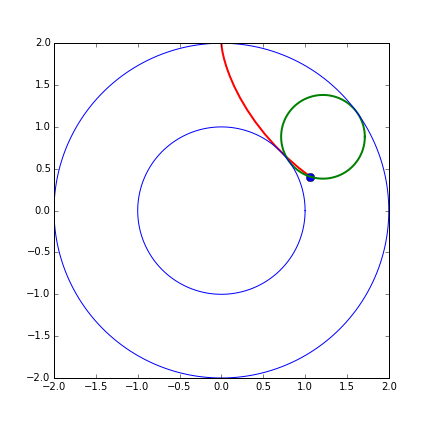
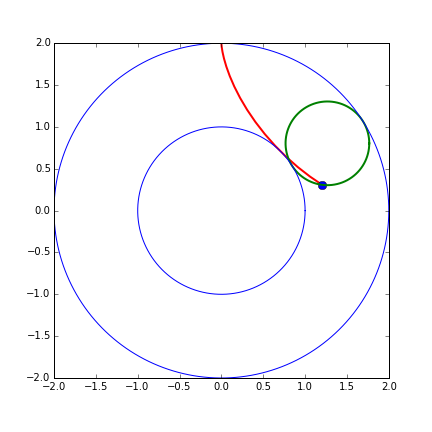
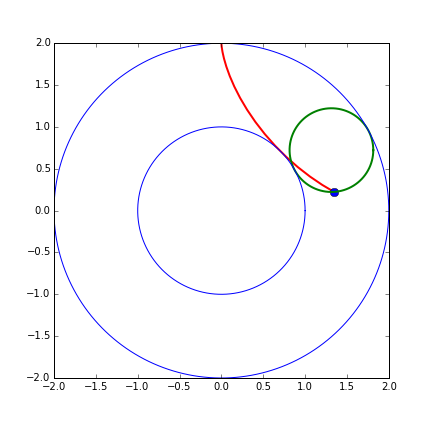
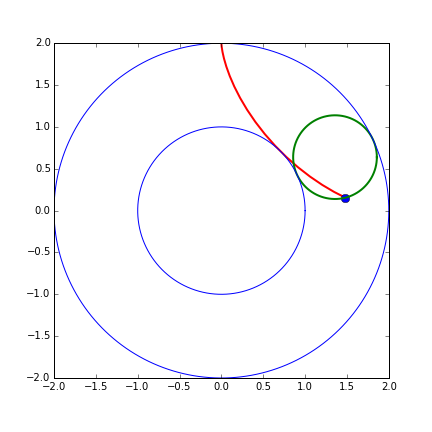
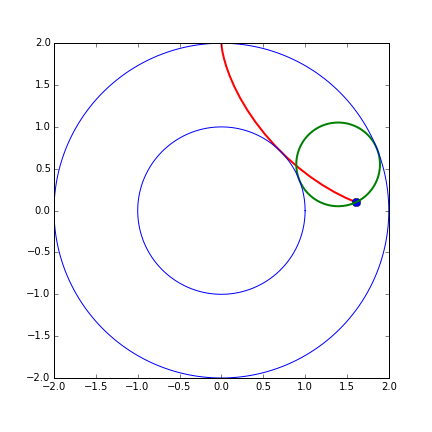
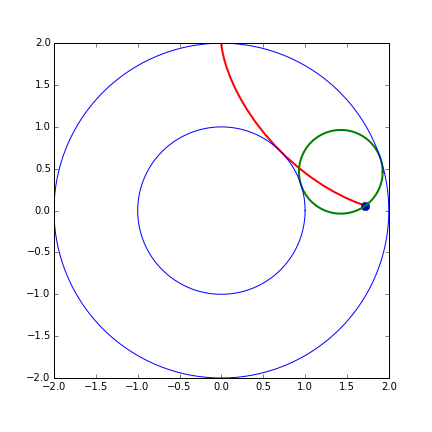
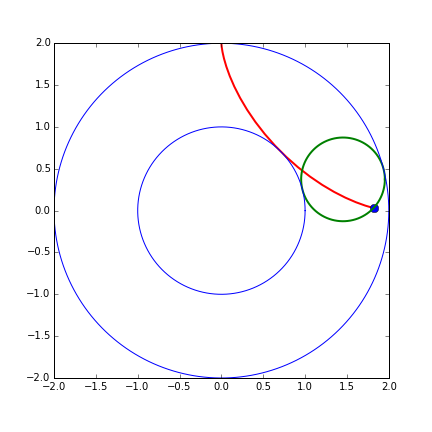
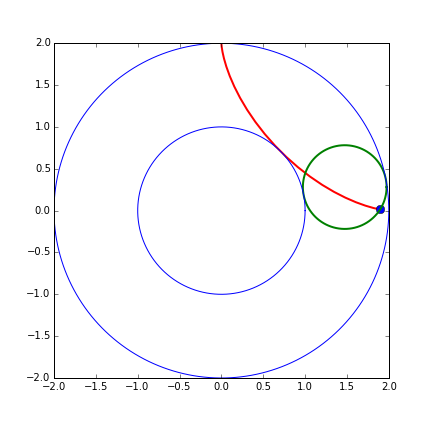
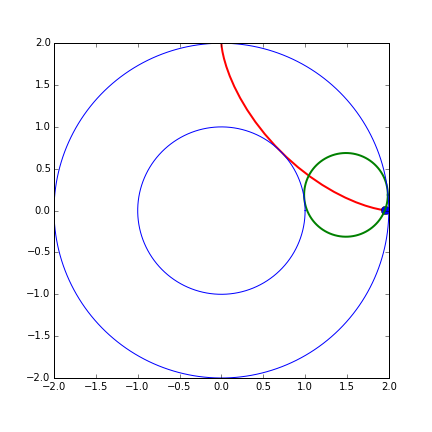
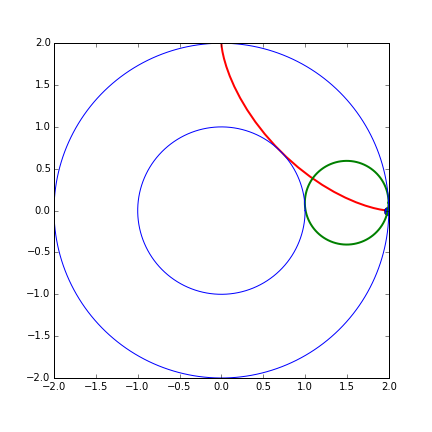
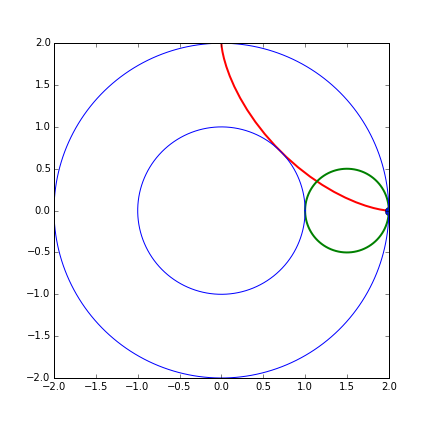
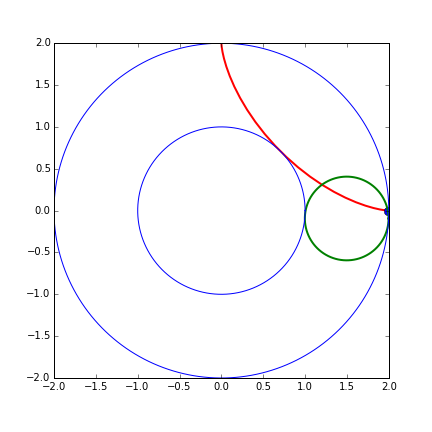
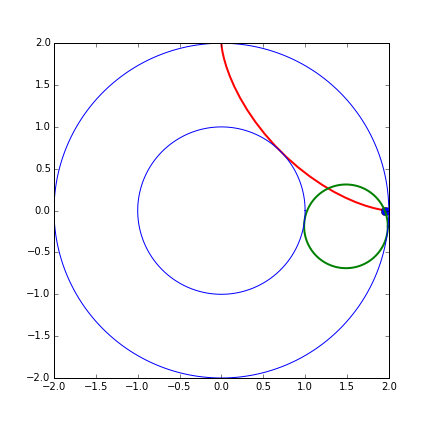
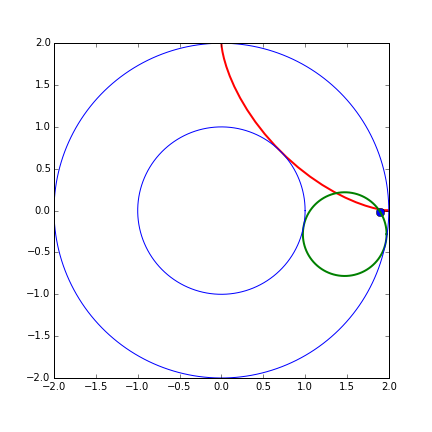
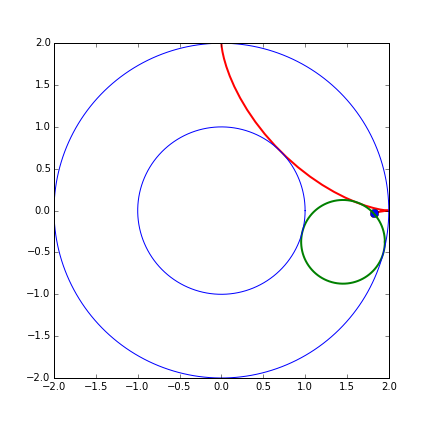
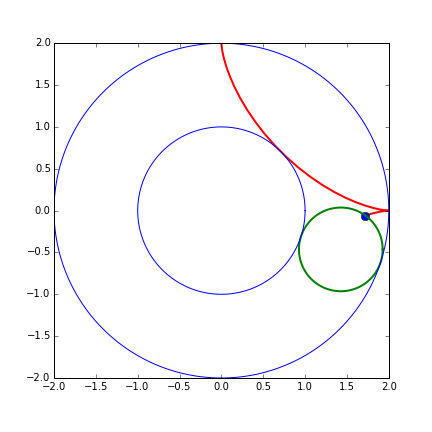
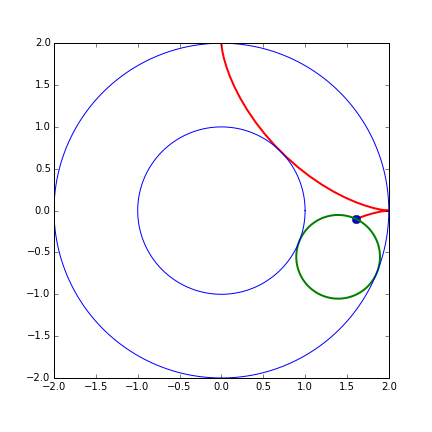
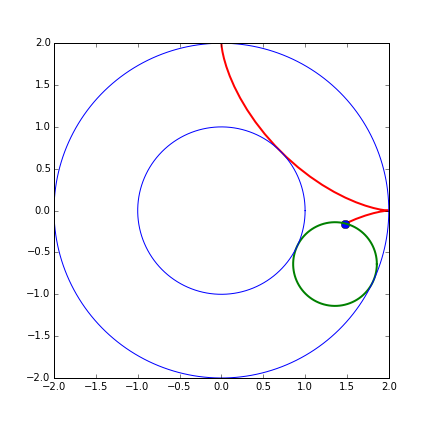
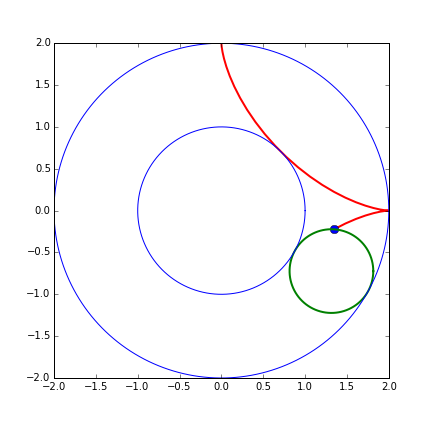
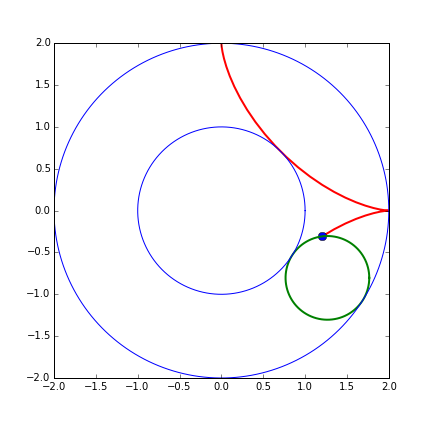
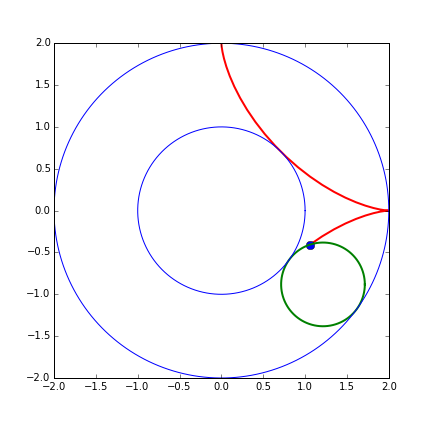
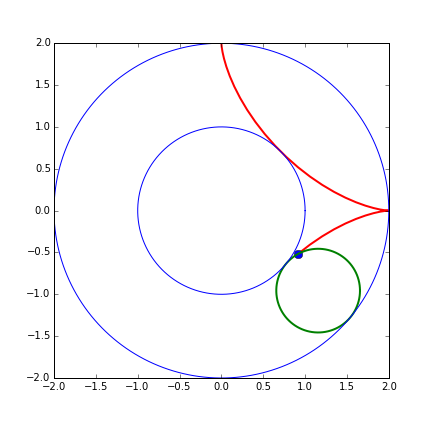
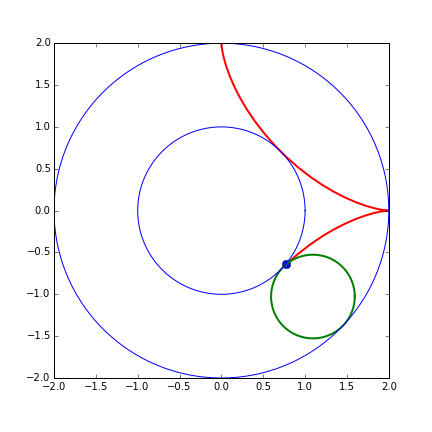
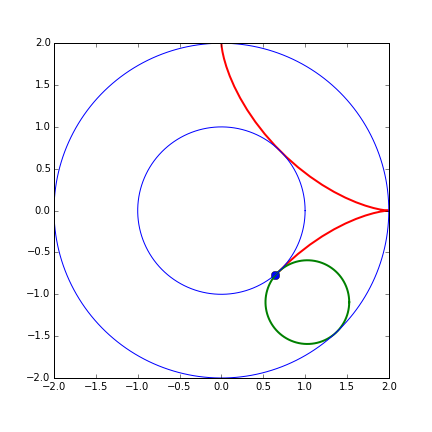
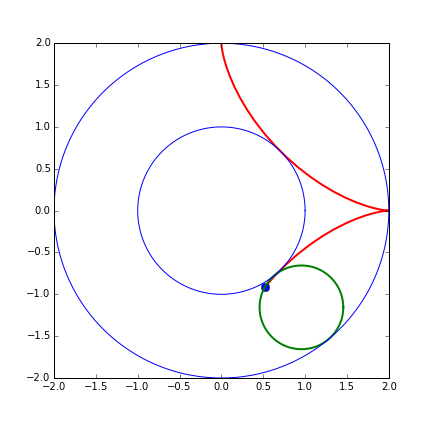
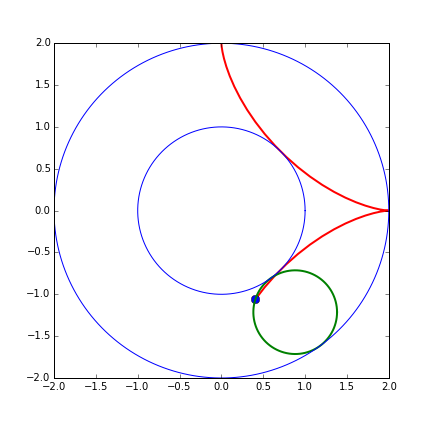
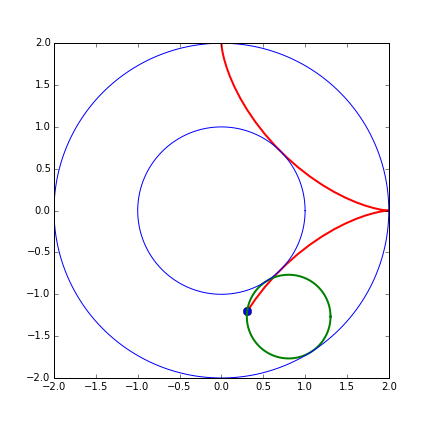
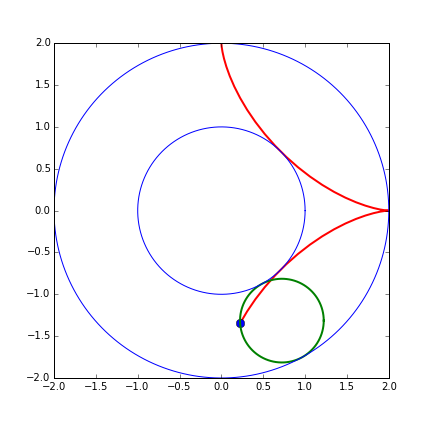
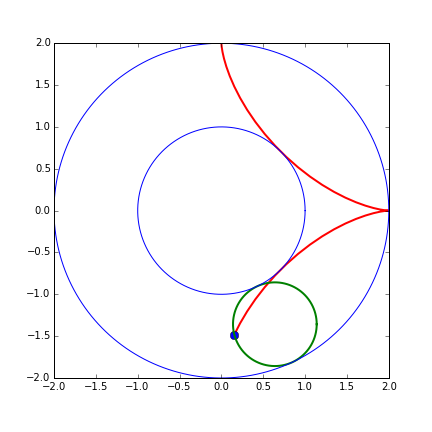
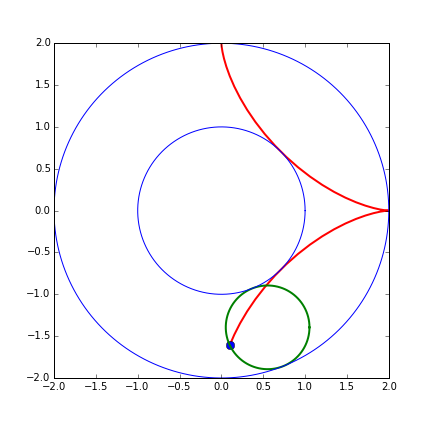
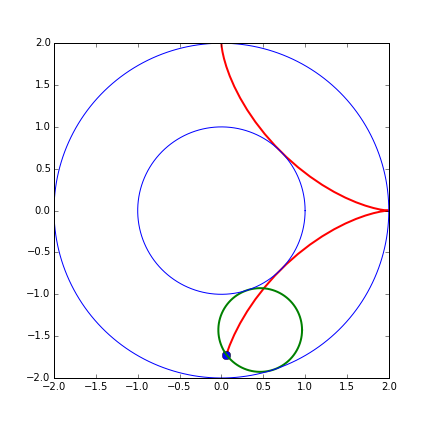
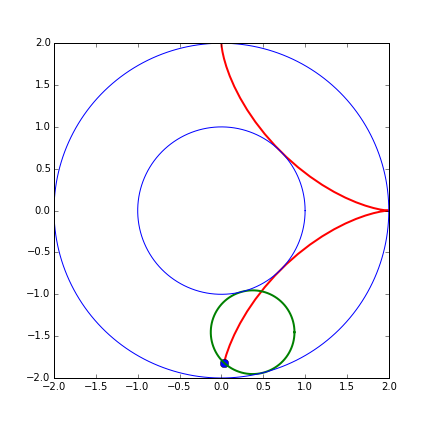
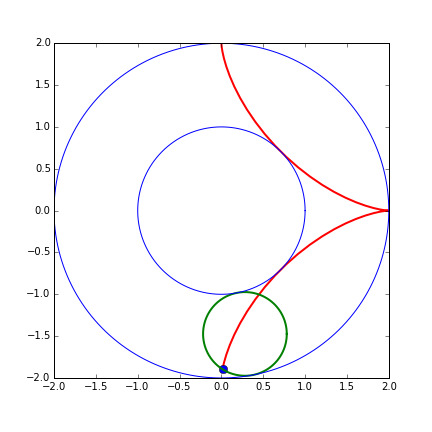
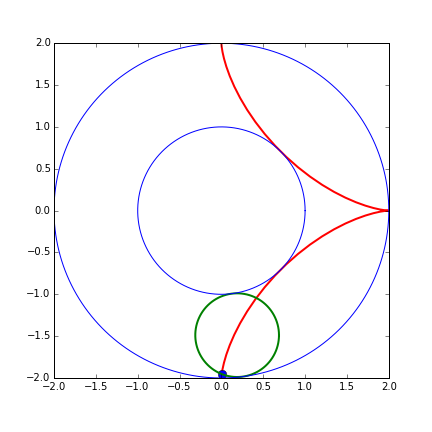
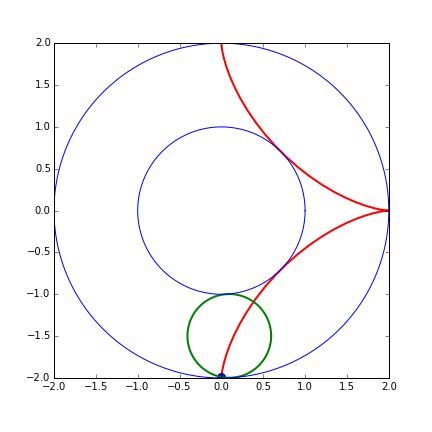
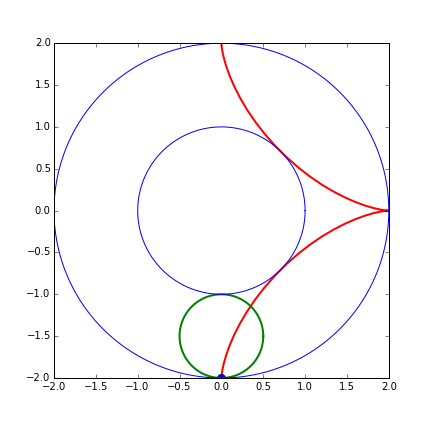
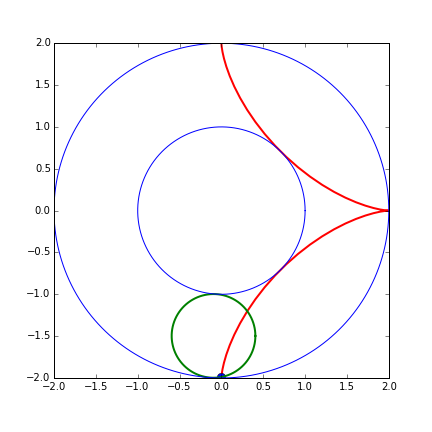
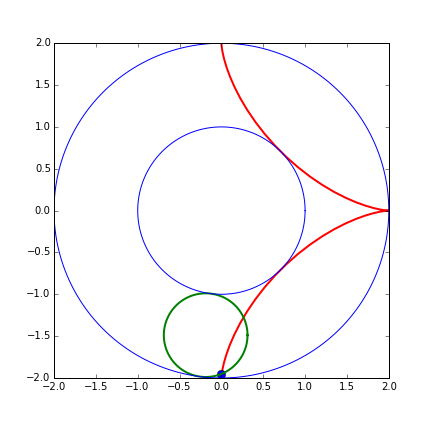
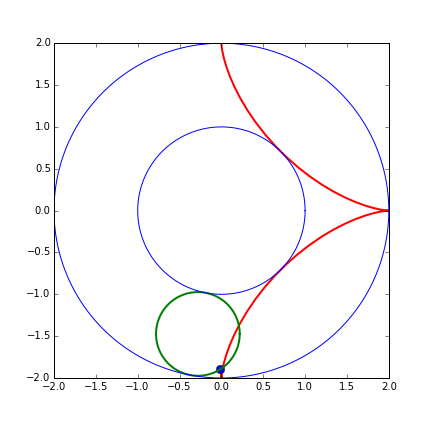
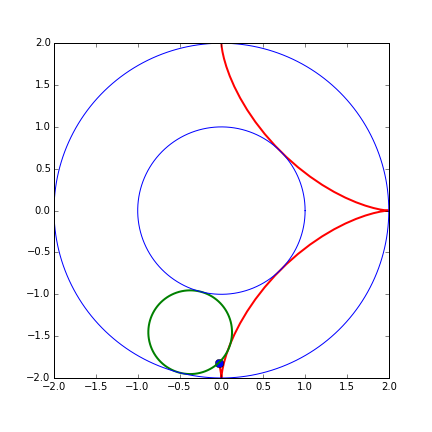
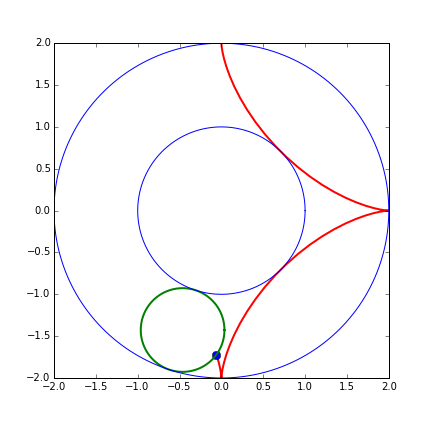
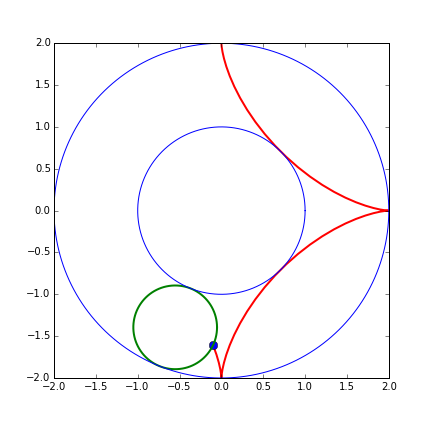
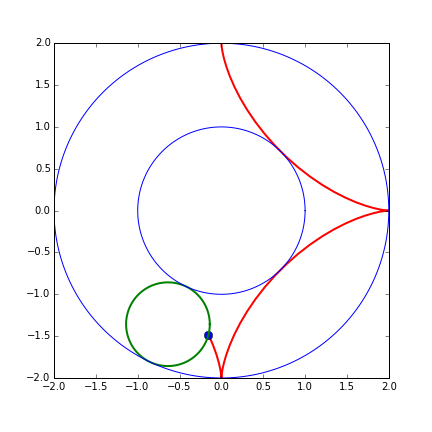
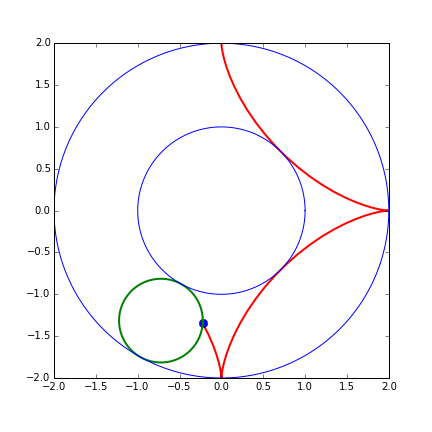
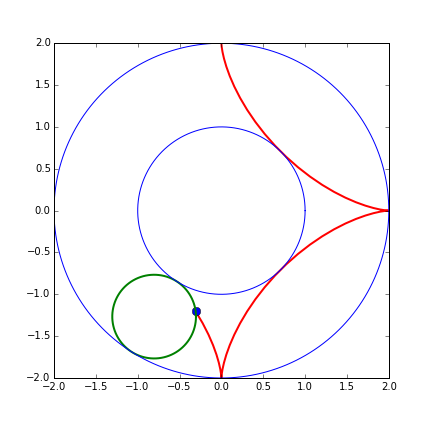
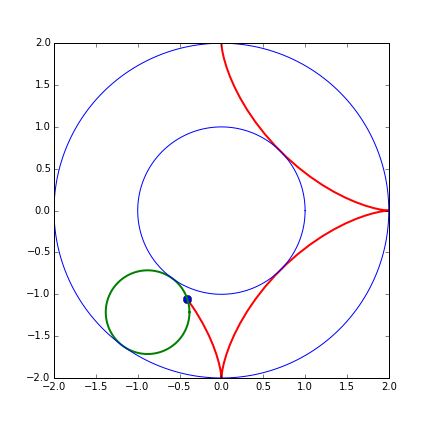
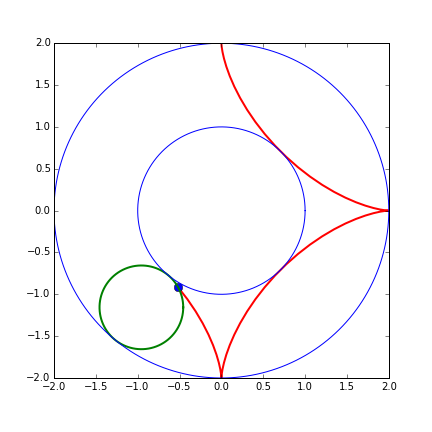
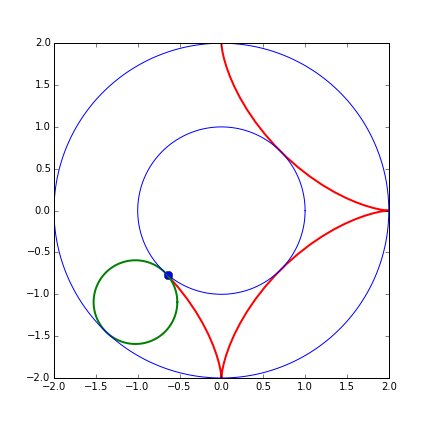
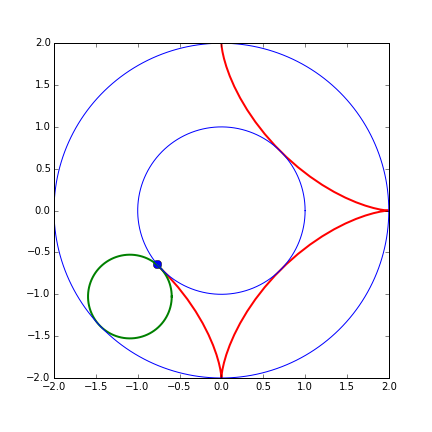
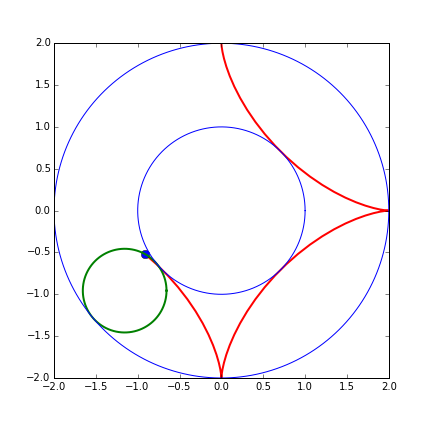
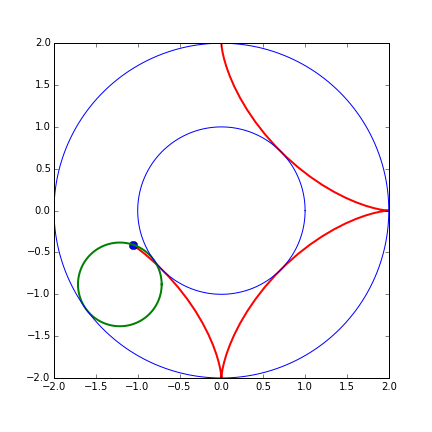
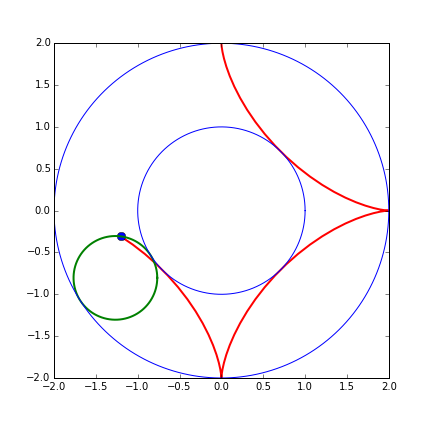
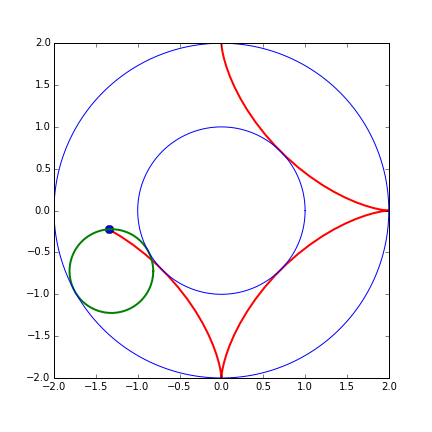
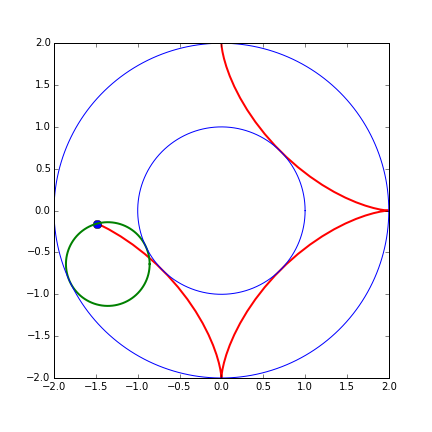
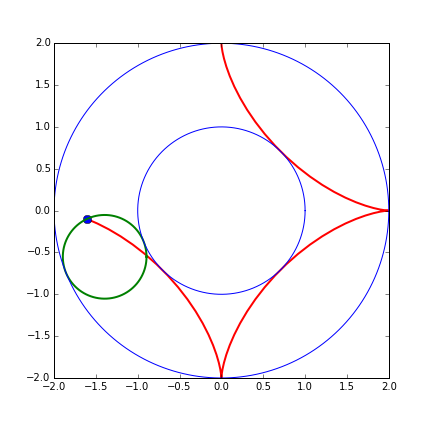
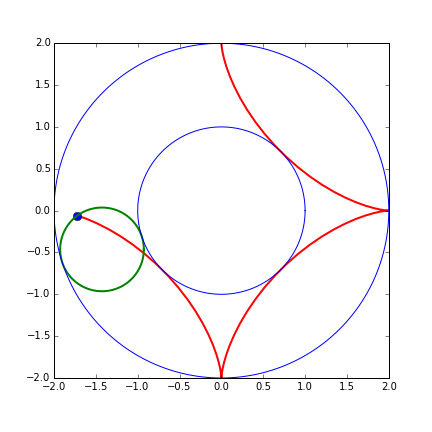
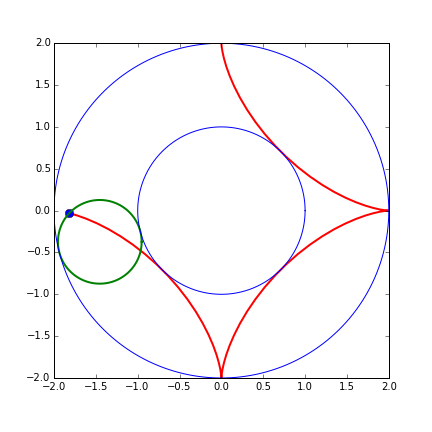
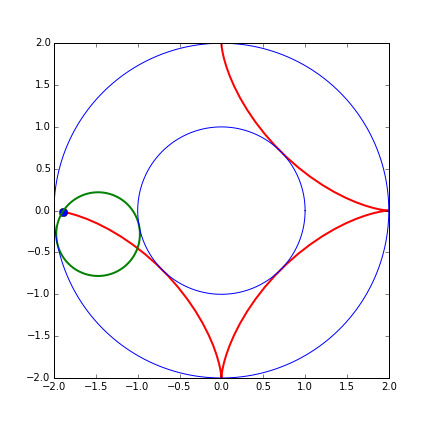
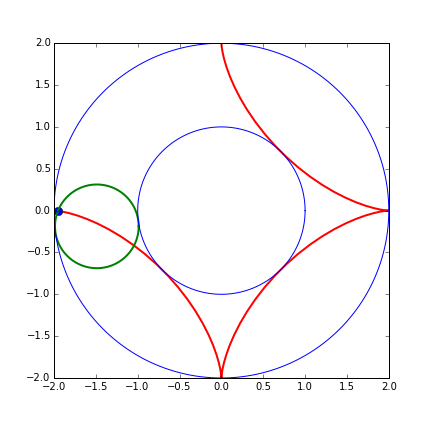
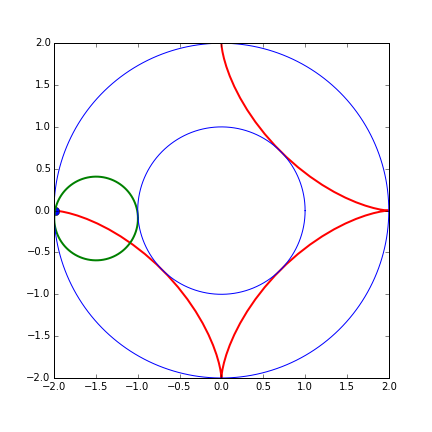
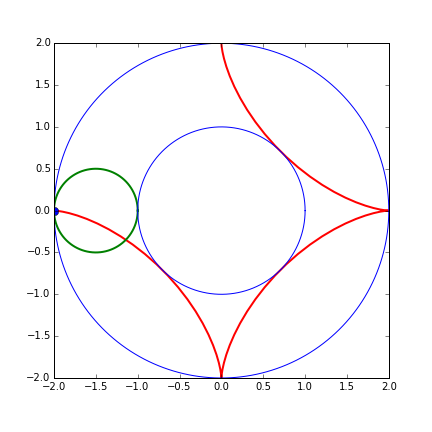
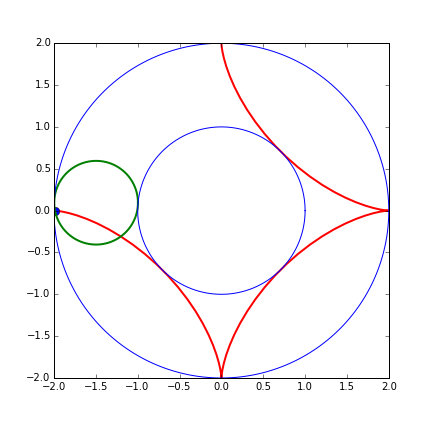
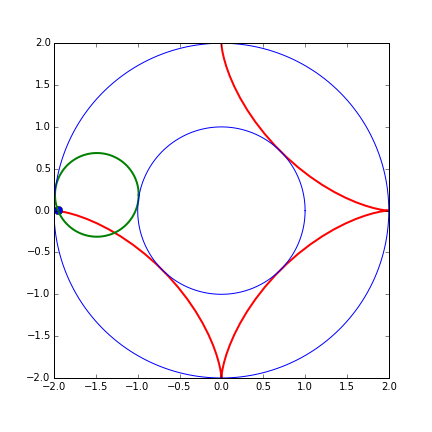
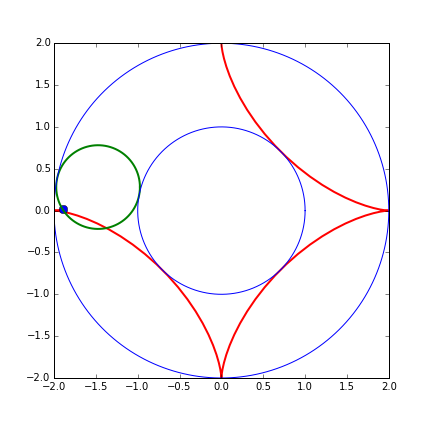
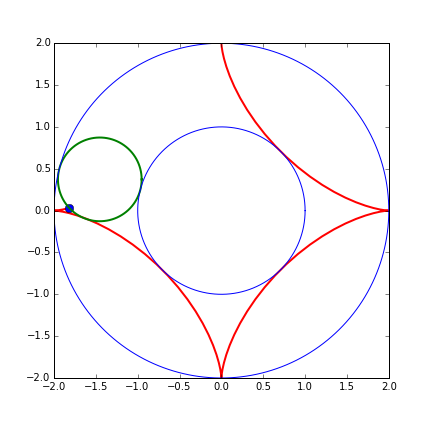
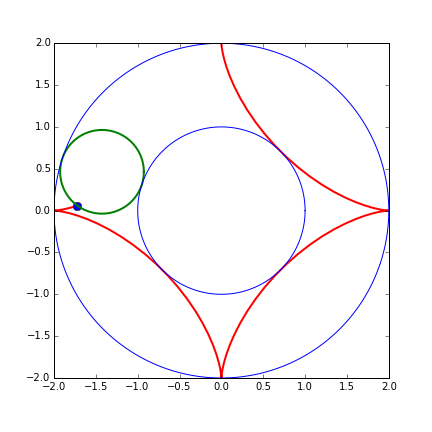
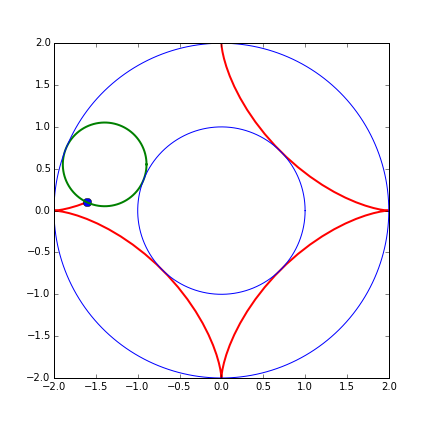
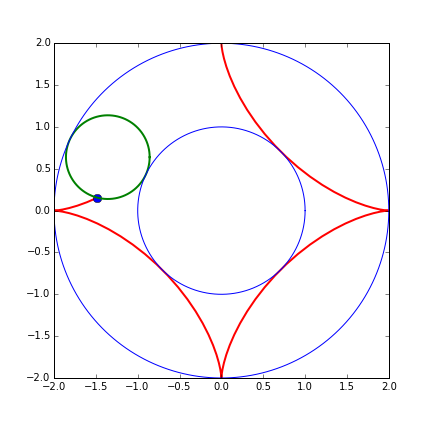
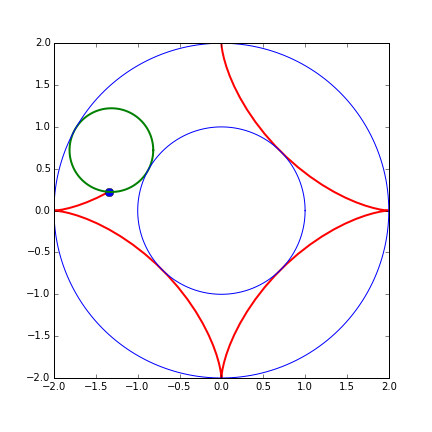
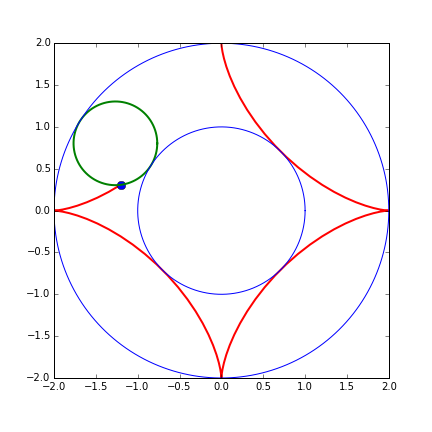
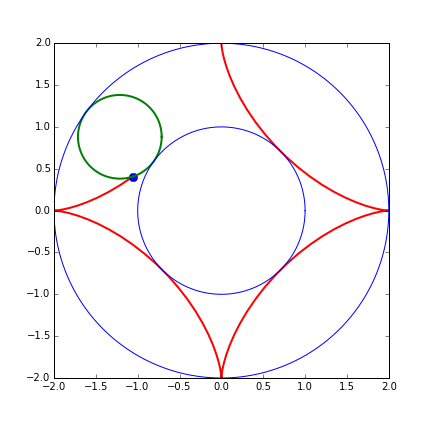
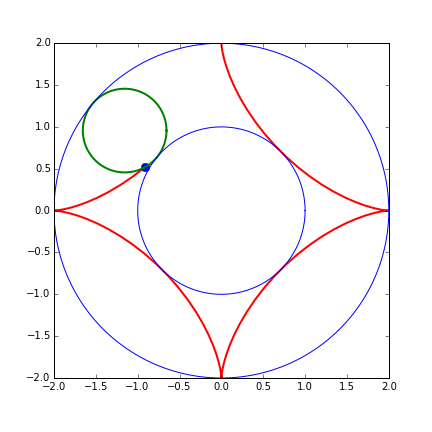
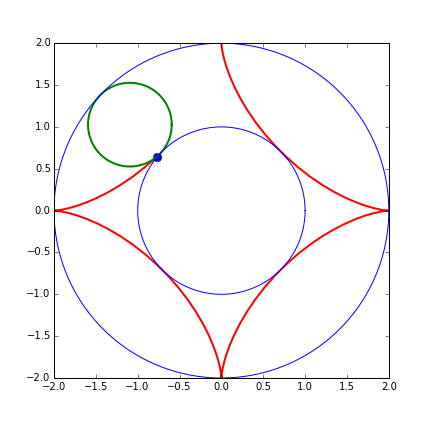
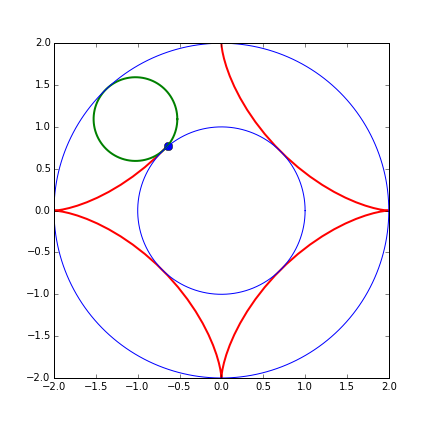
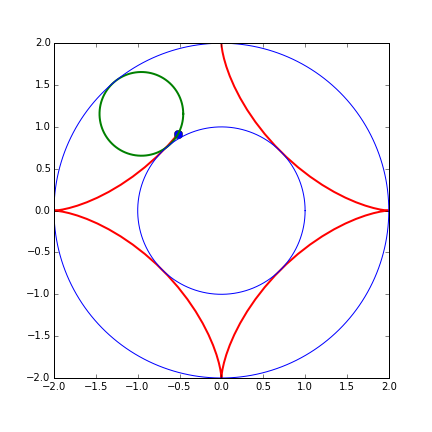
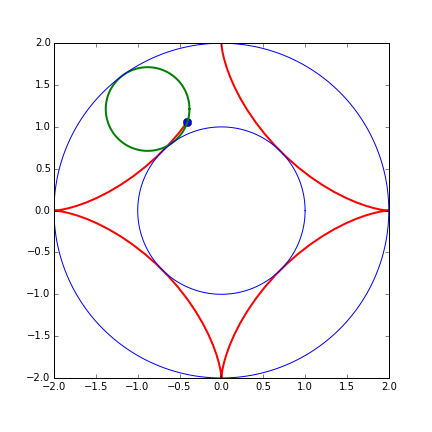
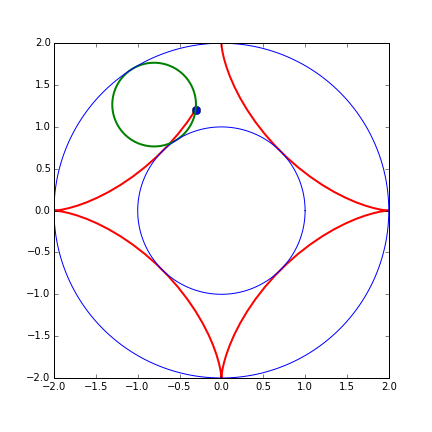
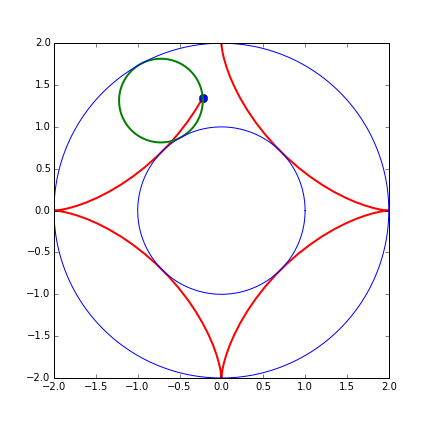
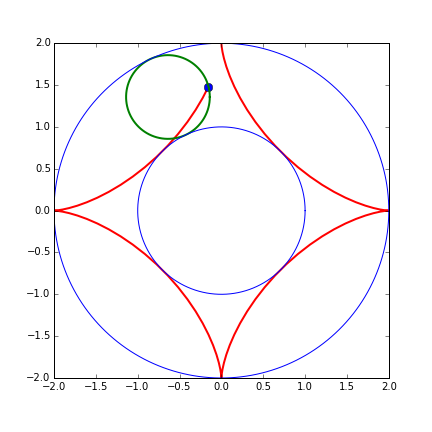
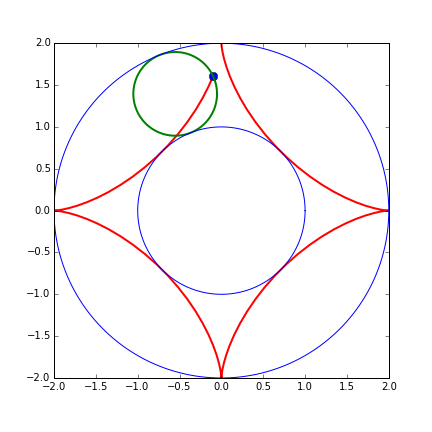
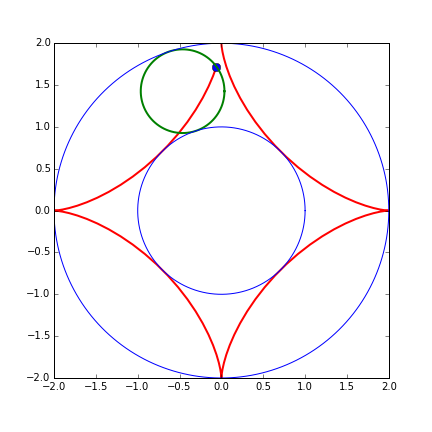
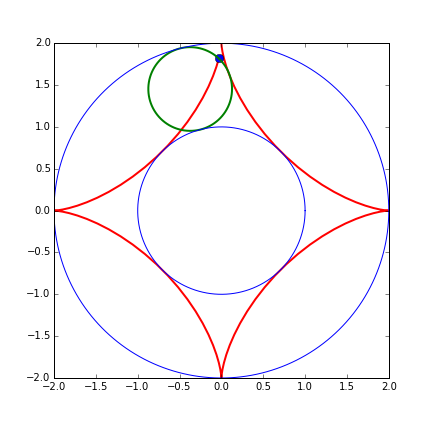
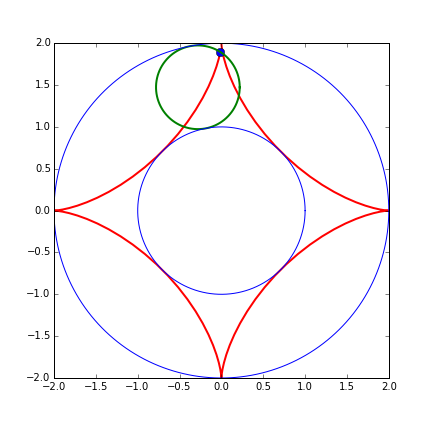
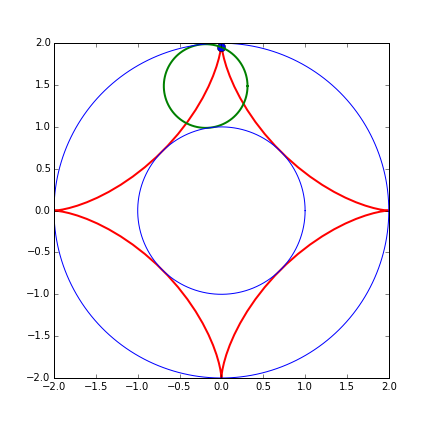
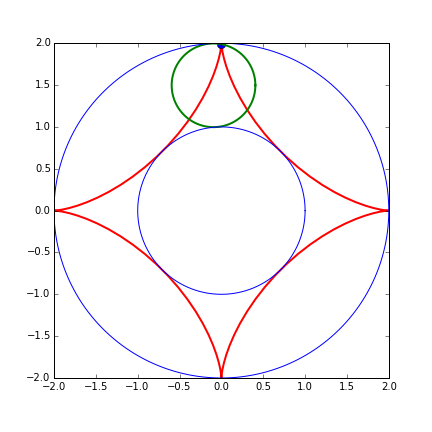

In [24]:
animation.FuncAnimation(fig, update, init_func=init, frames=nframes, blit=True)

Arc Length of Astroid
---
By Pythagorean theorem we get the the approximation of length of segment of two points, $M$ and $N$, which is close to each other:
$$ d s = \sqrt{ d x^2 + dy^2 }=\sqrt{\left(\frac{dx}{dt}\right)^2+ \left(\frac{dy}{dt}\right)^2}dt$$
Thus the arc length of one chord is:
$$\int_A^B ds=\int^{\pi/2}_0 \sqrt{\left(\frac{dx}{dt}\right)^2+ \left(\frac{dy}{dt}\right)^2}dt=3$$
This implies the total lenght of astroid is 12, i.e. sum of the arc lenghts of four equally-like chords.

In [33]:
import sympy as sp
from sympy import Symbol,integrate,diff,cos,sin,sqrt,pi,simplify

In [25]:
theta=Symbol("t")
a=Symbol("a")
f=sqrt((diff(a*cos(theta)**3,theta))**2+(diff(a*sin(theta)**3,theta))**2)
#integrate(f,(theta,0,pi/2))

Puzzle
---
Since the total length rolling along the circumference of big circle is the lenght of circumference of big circle outside, why is the arc length of astroid *not* equal to the length of rolling trajectory?

Create and Play Movie
---
Theoretically, HTML5 supports the multlimedia tag, video and audio, to play multimedia files. However, not all popular formats are playable within browers, for instance mp4 file can not played within firefox, webm not for Google's chrome and Apple's safari. 

The display function of IPython also integrates well with HTML5 functions such that it is not necessary to do Python work by Python programming. For instance, using the function IPython.display.HTML, we can not only play multimedia file by web client app, but also save the Python's resource to do similar work.   

In [38]:
anim = animation.FuncAnimation(fig,update, init_func=init, blit=False, interval=100, repeat=False)
anim.save('animation.webm', fps=20, writer="ffmpeg", codec="libvpx")
anim.save('animation.mp4', fps=20, writer="ffmpeg", codec="libx264")

In [8]:
from IPython.display import HTML
from base64 import b64encode
import base64

video = open("animation.mp4", "rb").read()
video_encoded = base64.b64encode(video)
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(video_tag)

In [11]:
def videoplay(fname, mimetype):
    """Load the video in the file `fname`, with given mimetype, and display as HTML5 video.
    """
    from IPython.display import HTML
    video_encoded1 = open(fname, "rb").read()
    video_encoded= base64.b64encode(video_encoded1)
    video_tag = '<video controls alt="test" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)
videoplay('animation.webm', 'webm')

In [31]:
import base64
from base64 import b64encode
def videoplay(fname, mimetype):
    """Load the video in the file `fname`, with given mimetype, and display as HTML5 video.
    """
    from IPython.display import HTML
    video_encoded1 = open(fname, "rb").read()
    video_encoded= base64.b64encode(video_encoded1)
    video_tag = '<video controls alt="test" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)
videoplay('animation.webm', 'webm')

In [60]:
from IPython.display import HTML
HTML(data='<video controls loop src="/static/animation.webm">')

In [39]:
from IPython.display import HTML
HTML(data='<video controls loop src="animation.mp4">')

## Bokeh Introduction

Another benefit brought by the IPython HTML-integration is interactive ability. Interactivity function can be implemented both for Python app and web app. Abide of both   

In [25]:
# Bokeh Introduction
from bokeh.io import gridplot, output_notebook, show
from bokeh.plotting import figure


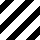
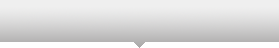
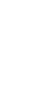
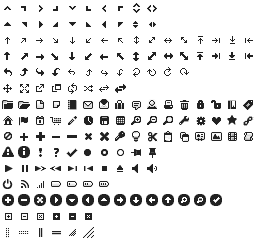
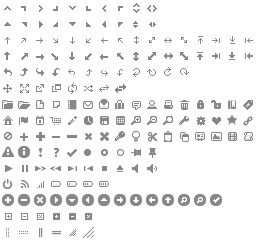
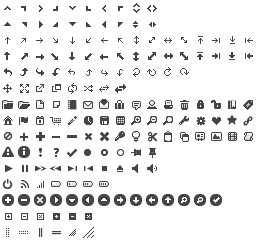
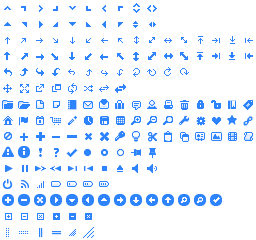
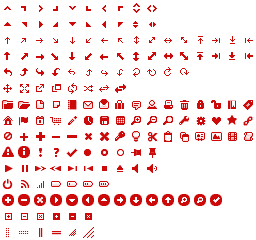
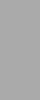
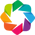
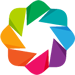
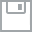
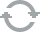
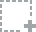
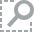
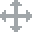
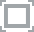
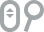

In [26]:
output_notebook()

In [29]:
from bokeh.models import Line,ColumnDataSource

t=np.linspace(0,6*np.pi,1000)
x=t-sin(t)
y=1-cos(t)

source = ColumnDataSource(data=dict(x=x, y=y))

p = figure(title="simple line example", plot_height=200, plot_width=600, y_range=(-1, 3))
p.line(x, y, color="#2222aa", alpha=0.5, line_width=2, source=source, name="foo") 

In [30]:
t=np.linspace(0,6*np.pi,1000)
x=t
y=sin(t)

source = ColumnDataSource(data=dict(x=x, y=y))
p = figure(title="simple line example", plot_height=200, plot_width=600, y_range=(-3, 3))
p.line(x, y, color="#2222aa", alpha=0.5, line_width=2, source=source, name="foo")


In [31]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    source.data['y'] = A * func(w * x + phi)
    source.push_notebook()

In [32]:
from IPython.html.widgets import interact
interact(update, f=["sin", "cos", "tan"], w=(0,10, 0.1), A=(0,3, 0.1), phi=(0, 10, 0.1)) 

<function __main__.update>

In [33]:

show(p) 